<a href="https://colab.research.google.com/github/ulefo/Adversarial-Attacks-Humor-Detection/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%BD%D0%B0%D1%8F_%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D1%8E%D1%89%D0%B0%D1%8F_%D0%92%D0%9A%D0%A0_%D0%A4%D1%80%D0%BE%D0%BB%D0%BE%D0%B2%D0%B0_%D0%A3%D0%BB%D1%8C%D1%8F%D0%BD%D0%B0_%D0%91%D0%9F%D0%9C%D0%98174.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка и анализ моделей распознвания юмора
*Фролова Ульяна, БПМИ174*

Программная часть ВКР состоит из следующих разделов:

__Предобработка и получение данных:__
извлечение данных в среду *Google Colab*, 
токенизация, приведение к нижнему регистру и прочие необходимые действия.

__Модели распознавания юмора на исходных данных:__
подходы, описанные в главе II ВКР - *Bag of Words, Word2Vec, Universal Sentence Encoder + ClassifierDL*. Модели протестированы и обучены на исходных данных. 

__Состязательные атаки:__
на упомянутых моделях тестируется использование состязательных атак из главы IV. Состязательные атаки применяются на тестовых множествах и включают в себя добавление слэнга 18+, замену слова на антоним и добавление рифмы к слову.


Наконец, в  двух разделах отображены графики, необходимые для подробного анализа. Все результаты в виде таблиц можно найти по следующей ссылке:
https://docs.google.com/document/d/1iIQ2iNrPMTSWs9wWyiabWMrvlLR8zQXzE49ush4hzUo/edit?usp=sharing


# Данные и распределение классов
В данном разделе датасеты загружаются в среду *Google Colab*. Далее производится проверка на баланс классов.

In [ ]:
#импорт необходимых библиотек
import keras
import gensim
import nltk
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import re
import codecs
import itertools

In [ ]:
import io

In [ ]:
#загрузка данных с компьютера
from google.colab import files

uploaded = files.upload()

Saving test_humicro.csv to test_humicro.csv
Saving test_oneliners.csv to test_oneliners.csv
Saving test_puns.csv to test_puns.csv
Saving test_unfunme.csv to test_unfunme.csv
Saving train_humicro.csv to train_humicro.csv
Saving train_oneliners.csv to train_oneliners.csv
Saving train_puns.csv to train_puns.csv
Saving train_unfunme.csv to train_unfunme.csv


Файлы загружены! Теперь можно создать *Dataframe* для обучающего и тестового множеств каждого датасета и посмотреть на баланс классов.

#### One-liners

In [ ]:
train_oneline = pd.read_csv(io.BytesIO(uploaded['train_oneliners.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
train_oneline = train_oneline.dropna()

In [ ]:
test_oneline = pd.read_csv(io.BytesIO(uploaded['test_oneliners.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
test_oneline = test_oneline.dropna()

In [ ]:
#процент классов у обучающего множества
print("Humorous: ", train_oneline["label"].value_counts()[0]/len(train_oneline)*100,"%")
print("Non-humorous: ", train_oneline["label"].value_counts()[1]/len(train_oneline)*100,"%")

Humorous:  50.19374701417273 %
Non-humorous:  49.12150326450448 %


In [ ]:
#процент классов у тестового множества
print("Humorous: ", test_oneline["label"].value_counts()[0]/len(test_oneline)*100,"%")
print("Non-humorous: ", test_oneline["label"].value_counts()[1]/len(test_oneline)*100,"%")

Humorous:  49.90473166084472 %
Non-humorous:  48.809145760558906 %


#### Humicroedit

In [ ]:
train_humicro = pd.read_csv(io.BytesIO(uploaded['train_humicro.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
train_humicro = train_humicro.dropna()

In [ ]:
test_humicro = pd.read_csv(io.BytesIO(uploaded['test_humicro.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
test_humicro = test_humicro.dropna()

In [ ]:
#процент классов у обучающего множества
print("Humorous: ", train_humicro["label"].value_counts()[0]/len(train_humicro)*100,"%")
print("Non-humorous: ", train_humicro["label"].value_counts()[1]/len(train_humicro)*100,"%")

Humorous:  49.88462875746752 %
Non-humorous:  49.78348136675412 %


In [ ]:
#процент классов у тестового множества
print("Humorous: ", test_humicro["label"].value_counts()[0]/len(test_humicro)*100,"%")
print("Non-humorous: ", test_humicro["label"].value_counts()[1]/len(test_humicro)*100,"%")

Humorous:  49.90519529768677 %
Non-humorous:  49.72506636329162 %


#### Unfunme

In [ ]:
train_unfun = pd.read_csv(io.BytesIO(uploaded['train_unfunme.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
train_unfun = train_unfun.dropna()

In [ ]:
test_unfun = pd.read_csv(io.BytesIO(uploaded['test_unfunme.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
test_unfun = test_unfun.dropna()

In [ ]:
#процент классов у обучающего множества
print("Humorous: ", train_unfun["label"].value_counts()[0]/len(train_unfun)*100,"%")
print("Non-humorous: ", train_unfun["label"].value_counts()[1]/len(train_unfun)*100,"%")

Humorous:  76.38691322901849 %
Non-humorous:  23.470839260312946 %


In [ ]:
#процент классов у тестового множества
print("Humorous: ", test_unfun["label"].value_counts()[0]/len(test_unfun)*100,"%")
print("Non-humorous: ", test_unfun["label"].value_counts()[1]/len(test_unfun)*100,"%")

Humorous:  76.47058823529412 %
Non-humorous:  23.422459893048128 %


#### PUNS

In [ ]:
train_puns = pd.read_csv(io.BytesIO(uploaded['train_puns.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
train_puns = train_puns.dropna()

In [ ]:
test_puns = pd.read_csv(io.BytesIO(uploaded['test_puns.csv']), names = ["text", "label"], header = 0)

In [ ]:
#удалим строки с нан значениями
test_puns = test_puns.dropna()

In [ ]:
#процент классов у обучающего множества
print("Humorous: ", train_puns["label"].value_counts()[0]/len(train_puns)*100,"%")
print("Non-humorous: ", train_puns["label"].value_counts()[1]/len(train_puns)*100,"%")

Humorous:  50.18998272884283 %
Non-humorous:  49.81001727115717 %


In [ ]:
#процент классов у тестового множества
print("Humorous: ", test_puns["label"].value_counts()[0]/len(test_puns)*100,"%")
print("Non-humorous: ", test_puns["label"].value_counts()[1]/len(test_puns)*100,"%")

Humorous:  50.20703933747412 %
Non-humorous:  49.79296066252588 %


# Предобработка данных
Далее производится обращение данных к нижнему регистру и токенизация - стандартные процедуры в использовании моделей обработки естественного языка (NLP)

### Обращение к нижнему регистру 

In [ ]:
#обращение к нижнему регистру 
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    return df

In [ ]:
clean_test_oneline = standardize_text(test_oneline, "text")

In [ ]:
clean_train_oneline = standardize_text(train_oneline, "text")

In [ ]:
clean_train_humicro = standardize_text(train_humicro, "text")

In [ ]:
clean_test_humicro = standardize_text(test_humicro, "text")

In [ ]:
clean_train_unfun = standardize_text(train_unfun, "text")

In [ ]:
clean_test_unfun = standardize_text(test_unfun, "text")

In [ ]:
clean_train_puns = standardize_text(train_puns, "text")

In [ ]:
clean_test_puns = standardize_text(test_puns, "text")

### Токенизация

In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

#### One-Liners

In [ ]:
clean_train_oneline["tokens"] = clean_train_oneline["text"].apply(tokenizer.tokenize)
clean_test_oneline["tokens"] = clean_test_oneline["text"].apply(tokenizer.tokenize)

clean_train_oneline.head()

,text,label,tokens
0,national u s avg prices for farmer-owned reserve,non-humorous;;,"[national, u, s, avg, prices, for, farmer, own..."
1,dollar jumps against mark after german rate cut,non-humorous;;,"[dollar, jumps, against, mark, after, german, ..."
2,the book or periodical most vital to the compl...,humorous;;,"[the, book, or, periodical, most, vital, to, t..."
3,user - a technical term used by computer pros ...,humorous;;,"[user, a, technical, term, used, by, computer,..."
4,never trust the arithmetic of a man who must t...,humorous;;,"[never, trust, the, arithmetic, of, a, man, wh..."


#### Humicroedit

In [ ]:
clean_train_humicro["tokens"] = clean_train_humicro["text"].apply(tokenizer.tokenize)
clean_test_humicro["tokens"] = clean_test_humicro["text"].apply(tokenizer.tokenize)

clean_train_humicro.head()

,text,label,tokens
0,ane fonda arrested fifth time while <protestin...,non-humorous;,"[ane, fonda, arrested, fifth, time, while, pro..."
1,ing 's security woes cause some tech <review/>...,non-humorous;,"[ing, s, security, woes, cause, some, tech, re..."
2,rump 's daca decision could cost thousands of ...,non-humorous;,"[rump, s, daca, decision, could, cost, thousan..."
3,trump plans to bring ' biggest cold cuts ever ...,humorous;,"[trump, plans, to, bring, biggest, cold, cuts,..."
4,bernie sanders declares himself a never wine-c...,humorous;,"[bernie, sanders, declares, himself, a, never,..."


#### Unfunme

In [ ]:
clean_train_unfun["tokens"] = clean_train_unfun["text"].apply(tokenizer.tokenize)
clean_test_unfun["tokens"] = clean_test_unfun["text"].apply(tokenizer.tokenize)

clean_train_unfun.head()

,text,label,tokens
0,george r r martin kills off whole family,humorous;,"[george, r, r, martin, kills, off, whole, family]"
1,metta world peace signs 2-year deal with ‘new ...,non-humorous;,"[metta, world, peace, signs, 2, year, deal, wi..."
2,study: dolphins not so fast on land,humorous;,"[study, dolphins, not, so, fast, on, land]"
3,really fun toy banned because of 3 stupid dead...,humorous;,"[really, fun, toy, banned, because, of, 3, stu..."
4,peyton manning injures neck in contract abortion,humorous;,"[peyton, manning, injures, neck, in, contract,..."


#### PUNS

In [ ]:
clean_train_puns["tokens"] = clean_train_puns["text"].apply(tokenizer.tokenize)
clean_test_puns["tokens"] = clean_test_puns["text"].apply(tokenizer.tokenize)

clean_train_puns.head()

,text,label,tokens
0,i m going to the guillotine at dawn and my wif...,humorous,"[i, m, going, to, the, guillotine, at, dawn, a..."
1,we didn t get the whole message and i don t kn...,non-humorous,"[we, didn, t, get, the, whole, message, and, i..."
2,the british cannibal enjoyed snacking on fish ...,humorous,"[the, british, cannibal, enjoyed, snacking, on..."
3,the hotel chef was noted for his tomfoolery an...,humorous,"[the, hotel, chef, was, noted, for, his, tomfo..."
4,when socrates needed to buy food he went to th...,humorous,"[when, socrates, needed, to, buy, food, he, we..."


# Оценка
Для удобства подсчёта метрик качества работы моделей, универсальная функция __get_metrics__ считает и выводит *accuracy, precision, recall и F-меру*. В свою очередь, __cleanse_semicolon__ работает для дополнительного удаления ненужных знаков препинания.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, labels=["humorous"],
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, labels=["humorous"],
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

In [ ]:
#функция для удаления лишних точек с запятой в конце классовых лейблов

def cleanse_semicolon(samples):
  samples = samples.str.replace(";;;","")
  samples = samples.str.replace(";;","")
  samples = samples.str.replace(";","")
  return samples


# BOW & Logistic regression

Первый подход: __Bag of Words & Logistic Regression__
Обучение и тесты на всех исходных множествах.

In [ ]:
#метод для получения векторных представлений BOW
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+')

In [ ]:
#классификатор логистической регрессии
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', random_state=40)

### Train on One-liners

In [ ]:
#oneline train test split
X_train_oneline = clean_train_oneline["text"]
X_test_oneline = clean_test_oneline["text"]
y_train_oneline = clean_train_oneline["label"]
y_test_oneline = clean_test_oneline["label"]

Создаём BOW-эмбеддинги:

In [ ]:
bow_oneline = dict()
bow_oneline["train"] = (count_vectorizer.fit_transform(X_train_oneline), y_train_oneline)
bow_oneline["test"]  = (count_vectorizer.transform(X_test_oneline), y_test_oneline)

Обучаем классификатор на полученных векторных представлениях:

In [ ]:
embedding_bow_oneline = bow_oneline
classifier = lr_classifier
classifier.fit(*embedding_bow_oneline["train"]) #обучение
bow_oneline_y_predict = classifier.predict(embedding_bow_oneline["test"][0]) #предсказание для исходного тестового множества

In [ ]:
bow_oneline_y_predict = pd.Series(bow_oneline_y_predict) #убираем лишнее
bow_oneline_y_predict = cleanse_semicolon(bow_oneline_y_predict)

In [ ]:
embedding_bow_oneline_test = pd.Series(embedding_bow_oneline["test"][1]) #убираем лишнее
embedding_bow_oneline_test = cleanse_semicolon(embedding_bow_oneline_test)

Посмотрим на результаты:

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_test, bow_oneline_y_predict)
print("Train on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: One-liners  Test on: One-liners 
accuracy = 0.812, precision = 0.835, recall = 0.774, f1 = 0.812
Precision and recall on humorous class


Ещё одной метрикой качества, которая пригодится нам в дальнейшем, является процент **несмешных** текстов, которые модель ошибочно классифицирует как **смешные**. Эта метрика строится только для тестов на данных, аналогичных обучающим множествам, и нужна для того, чтобы наблюдать эффективность состязательных атак - соответственно, мы хотим "обмануть" модель так, чтобы этот процент увеличился.

In [ ]:
oneliners_bow = get_metrics_adversarial(embedding_bow_oneline_test, bow_oneline_y_predict)
print("BOW \nTrain on: One-liners  Test on: One-liners \nPercent of misclassified non-humorous texts = %.3f%%\n" % (oneliners_bow))

BOW 
Train on: One-liners  Test on: One-liners 
Percent of misclassified non-humorous texts = 15.087%



Далее тестируем работу модели, обученной на *One-Liners*, на других тестовых множествах. Данные действия способствуют анализу схожести между разными юмористическими данными и выявлению общих структур юмора.

#### Тест на Humicroedit

In [ ]:
X_test_humicro = clean_test_humicro["text"] #создание тестовых выборок
y_test_humicro = clean_test_humicro["label"]

In [ ]:
bow_humicro = dict()
bow_humicro["test"]  = (count_vectorizer.transform(X_test_humicro), y_test_humicro)

In [ ]:
embedding_bow_oneline_test_humicro = bow_humicro #предсказываем на новом тестовом множестве
bow_humicro_from_oneline_y_predict = classifier.predict(embedding_bow_oneline_test_humicro["test"][0])

In [ ]:
bow_humicro_from_oneline_y_predict = pd.Series(bow_humicro_from_oneline_y_predict)
bow_humicro_from_oneline_y_predict = cleanse_semicolon(bow_humicro_from_oneline_y_predict)

In [ ]:
embedding_bow_oneline_test_hum = pd.Series(embedding_bow_oneline_test_humicro["test"][1])
embedding_bow_oneline_test_hum = cleanse_semicolon(embedding_bow_oneline_test_hum)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_test_hum, bow_humicro_from_oneline_y_predict)
print("Train on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

#### Тест на Unfunme

In [ ]:
X_test_unfun = clean_test_unfun["text"]
y_test_unfun = clean_test_unfun["label"]

In [ ]:
bow_unfun = dict()
bow_unfun["test"]  = (count_vectorizer.transform(X_test_unfun), y_test_unfun)

In [ ]:
embedding_bow_oneline_test_unfun = bow_unfun
bow_unfun_from_oneline_y_predict = classifier.predict(embedding_bow_oneline_test_unfun["test"][0])

In [ ]:
bow_unfun_from_oneline_y_predict = pd.Series(bow_unfun_from_oneline_y_predict)
bow_unfun_from_oneline_y_predict = cleanse_semicolon(bow_unfun_from_oneline_y_predict)

In [ ]:
embedding_bow_oneline_test_unf = pd.Series(embedding_bow_oneline_test_unfun["test"][1])
embedding_bow_oneline_test_unf = cleanse_semicolon(embedding_bow_oneline_test_unf)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_test_unf, bow_unfun_from_oneline_y_predict)
print("Train on: One-liners  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

#### Тест на PUNS

In [ ]:
X_test_puns = clean_test_puns["text"]
y_test_puns = clean_test_puns["label"]

In [ ]:
bow_puns = dict()
bow_puns["test"]  = (count_vectorizer.transform(X_test_puns), y_test_puns)

In [ ]:
embedding_bow_oneline_test_puns = bow_puns
bow_puns_from_oneline_y_predict = classifier.predict(embedding_bow_oneline_test_puns["test"][0])

In [ ]:
bow_puns_from_oneline_y_predict = pd.Series(bow_puns_from_oneline_y_predict)
bow_puns_from_oneline_y_predict = cleanse_semicolon(bow_puns_from_oneline_y_predict)

In [ ]:
embedding_bow_oneline_test_pun = pd.Series(embedding_bow_oneline_test_puns["test"][1])
embedding_bow_oneline_test_pun = cleanse_semicolon(embedding_bow_oneline_test_pun)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_test_pun, bow_puns_from_oneline_y_predict)
print("Train on: One-liners  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPreciaion and recall on humorous class" % (accuracy, precision, recall, f1))

#### Графики

Графики для тестов на исходных данных строятся по следующей схеме для каждого обучающего множества:

    F-мера на всех тестах
    accuracy на всех тестах
    precision на всех тестах
    recall на всех тестах

Сами графики для исходных данных отображены в Главе II.

In [ ]:
#библиотеки для графиков
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#F1
index = np.arange(4)
values = [0.812,0.506,0.439,0.508]
plt.title('Bow & Logistic Regression on Oneliners')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

In [ ]:
#accuracy
index = np.arange(4)
values = [0.812,0.527,0.420,0.513]


plt.title('Bow & Logistic Regression on Oneliners')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

In [ ]:
#precision
index = np.arange(4)
values = [0.835,0.546,0.806,0.513]
plt.title('Bow & Logistic Regression on Oneliners')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

In [ ]:
#recall
index = np.arange(4)
values = [0.774,0.320,0.320,0.623]
plt.title('Bow & Logistic Regression on Oneliners')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

### Train on Humicroedit

In [ ]:
#humicroedit train test split
X_train_humicro = clean_train_humicro["text"]
X_test_humicro = clean_test_humicro["text"]
y_train_humicro = clean_train_humicro["label"]
y_test_humicro = clean_test_humicro["label"]

In [ ]:
bow_humicro = dict()
bow_humicro["train"] = (count_vectorizer.fit_transform(X_train_humicro), y_train_humicro)
bow_humicro["test"]  = (count_vectorizer.transform(X_test_humicro), y_test_humicro)

In [ ]:
embedding_bow_humicro = bow_humicro
classifier = lr_classifier
classifier.fit(*embedding_bow_humicro["train"])
bow_humicro_y_predict = classifier.predict(embedding_bow_humicro["test"][0])

In [ ]:
bow_humicro_y_predict = pd.Series(bow_humicro_y_predict)
bow_humicro_y_predict = cleanse_semicolon(bow_humicro_y_predict)

In [ ]:
embedding_bow_humic = pd.Series(embedding_bow_humicro["test"][1])
embedding_bow_humic = cleanse_semicolon(embedding_bow_humic)

In [ ]:
#Массив для результатов классификации:

result_humicro_bow_f1 = [None] * 4
result_humicro_bow_acc = [None] * 4
result_humicro_bow_prec = [None] * 4
result_humicro_bow_rec = [None] * 4

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humic, bow_humicro_y_predict)
print("Train on: Humiroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Humiroedit  Test on: Humicroedit 
accuracy = 0.946, precision = 0.942, recall = 0.951, f1 = 0.946
Precision and recall on humorous class


In [ ]:
humicro_bow = get_metrics_adversarial(embedding_bow_humic, bow_humicro_y_predict)
print("BOW \nTrain on: Humicroedit  Test on: Humicroedit \nPercent of misclassified non-humorous texts = %.3f%%\n" % (humicro_bow))

BOW 
Train on: Humicroedit  Test on: Humicroedit 
Percent of misclassified non-humorous texts = 5.859%



#### Тест на One-Liners

In [ ]:
X_test_oneline = clean_test_oneline["text"]
y_test_oneline = clean_test_oneline["label"]

In [ ]:
bow_oneline = dict()
bow_oneline["test"]  = (count_vectorizer.transform(X_test_oneline), y_test_oneline)

In [ ]:
embedding_bow_humicro_test_oneline = bow_oneline
bow_oneline_from_humicro_y_predict = classifier.predict(embedding_bow_humicro_test_oneline["test"][0])

In [ ]:
bow_oneline_from_humicro_y_predict = pd.Series(bow_oneline_from_humicro_y_predict)
bow_oneline_from_humicro_y_predict = cleanse_semicolon(bow_oneline_from_humicro_y_predict)

In [ ]:
embedding_bow_humicro_test_one = pd.Series(embedding_bow_humicro_test_oneline["test"][1])
embedding_bow_humicro_test_one = cleanse_semicolon(embedding_bow_humicro_test_one)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_test_one, bow_oneline_from_humicro_y_predict)
print("Train on: Humiroedit  Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Humiroedit  Test on: One-Liners 
accuracy = 0.533, precision = 0.520, recall = 0.780, f1 = 0.504
Precision and recall on humorous class


#### Тест на Unfunme

In [ ]:
X_test_unfun = clean_test_unfun["text"]
y_test_unfun = clean_test_unfun["label"]

In [ ]:
bow_unfun = dict()
bow_unfun["test"]  = (count_vectorizer.transform(X_test_unfun), y_test_unfun)

In [ ]:
embedding_bow_humicro_test_unfun = bow_unfun
bow_unfun_from_humicro_y_predict = classifier.predict(embedding_bow_humicro_test_unfun["test"][0])

In [ ]:
bow_unfun_from_humicro_y_predict = pd.Series(bow_unfun_from_humicro_y_predict)
bow_unfun_from_humicro_y_predict = cleanse_semicolon(bow_unfun_from_humicro_y_predict)

In [ ]:
embedding_bow_humicro_test_unf = pd.Series(embedding_bow_humicro_test_unfun["test"][1])
embedding_bow_humicro_test_unf = cleanse_semicolon(embedding_bow_humicro_test_unf)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_test_unf, bow_unfun_from_humicro_y_predict)
print("Train on: Humiroedit  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Humiroedit  Test on: Unfunme 
accuracy = 0.630, precision = 0.765, recall = 0.746, f1 = 0.635
Precision and recall on humorous class


#### Тест на PUNS

In [ ]:
X_test_puns = clean_test_puns["text"]
y_test_puns = clean_test_puns["label"]

In [ ]:
bow_puns = dict()
bow_puns["test"]  = (count_vectorizer.transform(X_test_puns), y_test_puns)

In [ ]:
embedding_bow_humicro_test_puns = bow_puns
bow_puns_from_humicro_y_predict = classifier.predict(embedding_bow_humicro_test_puns["test"][0])

In [ ]:
bow_puns_from_humicro_y_predict = pd.Series(bow_puns_from_humicro_y_predict)
bow_puns_from_humicro_y_predict = cleanse_semicolon(bow_puns_from_humicro_y_predict)

In [ ]:
embedding_bow_humicro_test_pun = pd.Series(embedding_bow_humicro_test_puns["test"][1])
embedding_bow_humicro_test_pun = cleanse_semicolon(embedding_bow_humicro_test_pun)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_test_pun, bow_puns_from_humicro_y_predict)
print("Train on: Humiroedit  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPreciaion and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Humiroedit  Test on: PUNS 
accuracy = 0.492, precision = 0.496, recall = 0.751, f1 = 0.455
Preciaion and recall on humorous class


#### Графики

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

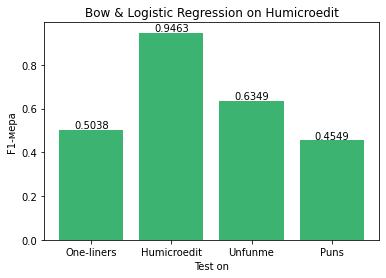

In [ ]:
#F1
index = np.arange(4)
values = [0.504,0.946,0.635,0.455]


plt.title('Bow & Logistic Regression on Humicroedit')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

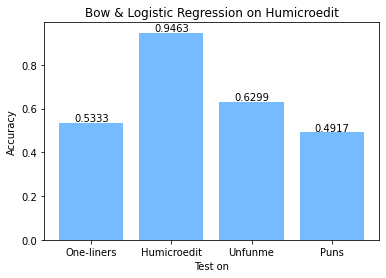

In [ ]:
#accuracy
index = np.arange(4)
values = [0.533,0.946,0.630,0.492]


plt.title('Bow & Logistic Regression on Humicroedit')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

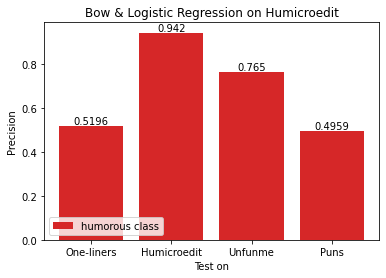

In [ ]:
#precision
index = np.arange(4)
values = [0.520,0.942,0.765,0.496]


plt.title('Bow & Logistic Regression on Humicroedit')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

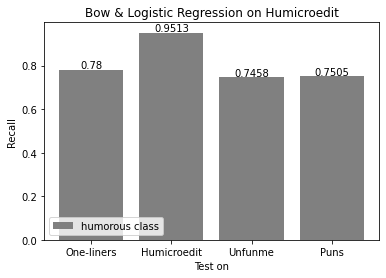

In [ ]:
#recall
index = np.arange(4)
values = [0.780,0.951,0.746,0.751]


plt.title('Bow & Logistic Regression on Humicroedit')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

### Train on Unfun

In [ ]:
#unfun train test split
X_train_unfun = clean_train_unfun["text"]
X_test_unfun = clean_test_unfun["text"]
y_train_unfun = clean_train_unfun["label"]
y_test_unfun = clean_test_unfun["label"]

In [ ]:
bow_unfun = dict()
bow_unfun["train"] = (count_vectorizer.fit_transform(X_train_unfun), y_train_unfun)
bow_unfun["test"]  = (count_vectorizer.transform(X_test_unfun), y_test_unfun)

In [ ]:
embedding_bow_unfun = bow_unfun
classifier = lr_classifier
classifier.fit(*embedding_bow_unfun["train"])
bow_unfun_y_predict = classifier.predict(embedding_bow_unfun["test"][0])

In [ ]:
bow_unfun_y_predict = pd.Series(bow_unfun_y_predict)
bow_unfun_y_predict = cleanse_semicolon(bow_unfun_y_predict)

In [ ]:
embedding_bow_unf = pd.Series(embedding_bow_unfun["test"][1])
embedding_bow_unf = cleanse_semicolon(embedding_bow_unf)

In [ ]:
result_unfun_bow_f1 = [None] * 4
result_unfun_bow_acc = [None] * 4
result_unfun_bow_prec = [None] * 4
result_unfun_bow_rec = [None] * 4

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unf, bow_unfun_y_predict)
print("Train on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Unfunme  Test on: Unfunme 
accuracy = 0.721, precision = 0.788, recall = 0.869, f1 = 0.700
Precision and recall on humorous class


In [ ]:
unfun_bow = get_metrics_adversarial(embedding_bow_unf, bow_unfun_y_predict)
print("BOW\nTrain on: Unfunme  Test on: Unfunme \nPercent of misclassified non-humorous texts = %.3f%%\n" % (unfun_bow))

BOW
Train on: Unfunme  Test on: Unfunme 
Percent of misclassified non-humorous texts = 76.256%



#### Тест на One-Liners

In [ ]:
X_test_oneline = clean_test_oneline["text"]
y_test_oneline = clean_test_oneline["label"]

In [ ]:
bow_oneline = dict()
bow_oneline["test"]  = (count_vectorizer.transform(X_test_oneline), y_test_oneline)

In [ ]:
embedding_bow_unfun_test_oneline = bow_oneline
bow_oneline_from_unfun_y_predict = classifier.predict(embedding_bow_unfun_test_oneline["test"][0])

In [ ]:
bow_oneline_from_unfun_y_predict = pd.Series(bow_oneline_from_unfun_y_predict)
bow_oneline_from_unfun_y_predict = cleanse_semicolon(bow_oneline_from_unfun_y_predict)

In [ ]:
embedding_bow_unfun_test_one = pd.Series(embedding_bow_unfun_test_oneline["test"][1])
embedding_bow_unfun_test_one = cleanse_semicolon(embedding_bow_unfun_test_one)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_test_one, bow_oneline_from_unfun_y_predict)
print("Train on: Unfunme  Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Unfunme  Test on: One-Liners 
accuracy = 0.532, precision = 0.521, recall = 0.695, f1 = 0.520
Precision and recall on humorous class


#### Тест на Humicroedit

In [ ]:
X_test_humicro = clean_test_humicro["text"]
y_test_humicro = clean_test_humicro["label"]

In [ ]:
bow_humicro = dict()
bow_humicro["test"]  = (count_vectorizer.transform(X_test_humicro), y_test_humicro)

In [ ]:
embedding_bow_unfun_test_humicro = bow_humicro
bow_humicro_from_unfun_y_predict = classifier.predict(embedding_bow_unfun_test_humicro["test"][0])

In [ ]:
bow_humicro_from_unfun_y_predict = pd.Series(bow_humicro_from_unfun_y_predict)
bow_humicro_from_unfun_y_predict = cleanse_semicolon(bow_humicro_from_unfun_y_predict)

In [ ]:
embedding_bow_unfun_test_humic = pd.Series(embedding_bow_unfun_test_humicro["test"][1])
embedding_bow_unfun_test_humic = cleanse_semicolon(embedding_bow_unfun_test_humic)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_test_humic, bow_humicro_from_unfun_y_predict)
print("Train on: Unfunme  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Unfunme  Test on: Humicroedit 
accuracy = 0.478, precision = 0.476, recall = 0.453, f1 = 0.477
Precision and recall on humorous class


#### Тест на PUNS

In [ ]:
X_test_puns = clean_test_puns["text"]
y_test_puns = clean_test_puns["label"]

In [ ]:
bow_puns = dict()
bow_puns["test"]  = (count_vectorizer.transform(X_test_puns), y_test_puns)

In [ ]:
embedding_bow_unfun_test_puns = bow_puns
bow_puns_from_unfun_y_predict = classifier.predict(embedding_bow_unfun_test_puns["test"][0])

In [ ]:
bow_puns_from_unfun_y_predict = pd.Series(bow_puns_from_unfun_y_predict)
bow_puns_from_unfun_y_predict = cleanse_semicolon(bow_puns_from_unfun_y_predict)

In [ ]:
embedding_bow_unfun_test_pun = pd.Series(embedding_bow_unfun_test_puns["test"][1])
embedding_bow_unfun_test_pun = cleanse_semicolon(embedding_bow_unfun_test_pun)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_test_pun, bow_puns_from_unfun_y_predict)
print("Train on: Unfunme  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: Unfunme  Test on: PUNS 
accuracy = 0.482, precision = 0.489, recall = 0.658, f1 = 0.466
Precision and recall on humorous class


#### Графики

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

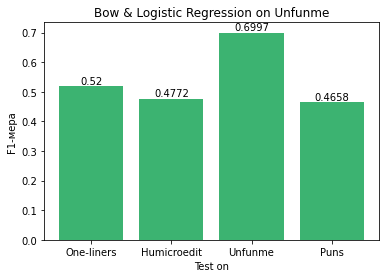

In [ ]:
#F1
index = np.arange(4)
values = [0.520,0.477,0.700,0.466]


plt.title('Bow & Logistic Regression on Unfunme')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

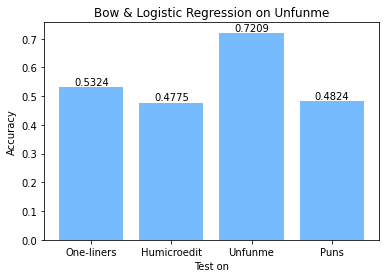

In [ ]:
#accuracy
index = np.arange(4)
values = [0.532,0.478,0.721,0.482]


plt.title('Bow & Logistic Regression on Unfunme')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

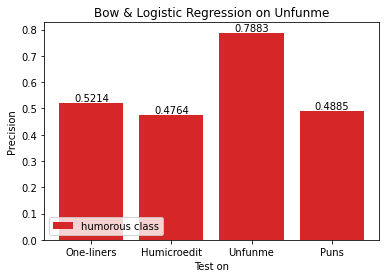

In [ ]:
#precision
index = np.arange(4)
values = [0.521,0.476,0.788,0.489]


plt.title('Bow & Logistic Regression on Unfunme')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

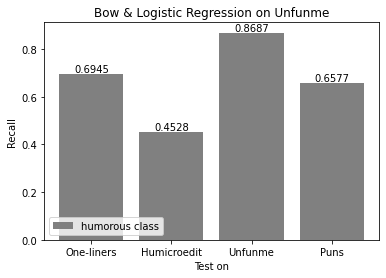

In [ ]:
#recall
index = np.arange(4)
values = [0.695,0.453,0.869,0.658]
plt.title('Bow & Logistic Regression on Unfunme')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

### Train on PUNS

In [ ]:
#puns train test split
X_train_puns = clean_train_puns["text"]
X_test_puns = clean_test_puns["text"]
y_train_puns = clean_train_puns["label"]
y_test_puns = clean_test_puns["label"]

In [ ]:
bow_puns = dict()
bow_puns["train"] = (count_vectorizer.fit_transform(X_train_puns), y_train_puns)
bow_puns["test"]  = (count_vectorizer.transform(X_test_puns), y_test_puns)

In [ ]:
embedding_bow_puns = bow_puns
classifier = lr_classifier
classifier.fit(*embedding_bow_puns["train"])
bow_puns_y_predict = classifier.predict(embedding_bow_puns["test"][0])

In [ ]:
bow_puns_y_predict = pd.Series(bow_puns_y_predict)
bow_puns_y_predict = cleanse_semicolon(bow_puns_y_predict)

In [ ]:
embedding_bow_pun = pd.Series(embedding_bow_puns["test"][1])
embedding_bow_pun = cleanse_semicolon(embedding_bow_pun)

In [ ]:
result_puns_bow_f1 = [None] * 4
result_puns_bow_acc = [None] * 4
result_puns_bow_prec = [None] * 4
result_puns_bow_rec = [None] * 4

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_pun, bow_puns_y_predict)
print("Train on: PUNS  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: PUNS  Test on: PUNS 
accuracy = 0.742, precision = 0.758, recall = 0.715, f1 = 0.742
Precision and recall on humorous class


In [ ]:
puns_bow = get_metrics_adversarial(embedding_bow_pun, bow_puns_y_predict)
print("BOW\nTrain on: Puns  Test on: Puns \nPercent of misclassified non-humorous texts = %.3f%%\n" % (puns_bow))

BOW
Train on: Puns  Test on: Puns 
Percent of misclassified non-humorous texts = 23.077%



#### Тест на One-Liners

In [ ]:
X_test_oneline = clean_test_oneline["text"]
y_test_oneline = clean_test_oneline["label"]

In [ ]:
bow_oneline = dict()
bow_oneline["test"]  = (count_vectorizer.transform(X_test_oneline), y_test_oneline)

In [ ]:
embedding_bow_puns_test_oneline = bow_oneline
bow_oneline_from_puns_y_predict = classifier.predict(embedding_bow_puns_test_oneline["test"][0])

In [ ]:
bow_oneline_from_puns_y_predict = pd.Series(bow_oneline_from_puns_y_predict)
bow_oneline_from_puns_y_predict = cleanse_semicolon(bow_oneline_from_puns_y_predict)

In [ ]:
embedding_bow_puns_test_one = pd.Series(embedding_bow_puns_test_oneline["test"][1])
embedding_bow_puns_test_one = cleanse_semicolon(embedding_bow_puns_test_one)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_test_one, bow_oneline_from_puns_y_predict)
print("Train on: PUNS Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: PUNS Test on: One-Liners 
accuracy = 0.435, precision = 0.423, recall = 0.382, f1 = 0.434
Precision and recall on humorous class


#### Тест на Humicroedit

In [ ]:
X_test_humicro = clean_test_humicro["text"]
y_test_humicro = clean_test_humicro["label"]

In [ ]:
bow_humicro = dict()
bow_humicro["test"]  = (count_vectorizer.transform(X_test_humicro), y_test_humicro)

In [ ]:
embedding_bow_puns_test_humicro = bow_humicro
bow_humicro_from_puns_y_predict = classifier.predict(embedding_bow_puns_test_humicro["test"][0])

In [ ]:
bow_humicro_from_puns_y_predict = pd.Series(bow_humicro_from_puns_y_predict)
bow_humicro_from_puns_y_predict = cleanse_semicolon(bow_humicro_from_puns_y_predict)

In [ ]:
embedding_bow_puns_test_humic = pd.Series(embedding_bow_puns_test_humicro["test"][1])
embedding_bow_puns_test_humic = cleanse_semicolon(embedding_bow_puns_test_humic)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_test_humic, bow_humicro_from_puns_y_predict)
print("Train on: PUNS  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: PUNS  Test on: Humicroedit 
accuracy = 0.501, precision = 0.501, recall = 0.531, f1 = 0.500
Precision and recall on humorous class


#### Тест на Unfunme

In [ ]:
X_test_unfun = clean_test_unfun["text"]
y_test_unfun = clean_test_unfun["label"]

In [ ]:
bow_unfun = dict()
bow_unfun["test"]  = (count_vectorizer.transform(X_test_unfun), y_test_unfun)

In [ ]:
embedding_bow_puns_test_unfun = bow_unfun
bow_unfun_from_puns_y_predict = classifier.predict(embedding_bow_puns_test_unfun["test"][0])

In [ ]:
bow_unfun_from_puns_y_predict = pd.Series(bow_unfun_from_puns_y_predict)
bow_unfun_from_puns_y_predict = cleanse_semicolon(bow_unfun_from_puns_y_predict)

In [ ]:
embedding_bow_puns_test_unf = pd.Series(embedding_bow_puns_test_unfun["test"][1])
embedding_bow_puns_test_unf = cleanse_semicolon(embedding_bow_puns_test_unf)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_test_unf, bow_unfun_from_puns_y_predict)
print("Train on: PUNS  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Train on: PUNS  Test on: Unfunme 
accuracy = 0.473, precision = 0.728, recall = 0.497, f1 = 0.513
Precision and recall on humorous class


#### Графики

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

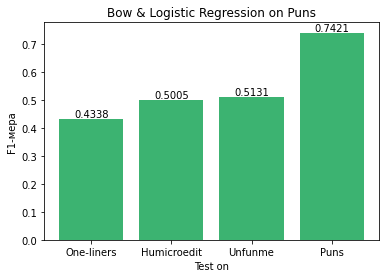

In [ ]:
#F1
index = np.arange(4)
values = [0.434,0.500,0.513,0.742]


plt.title('Bow & Logistic Regression on Puns')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

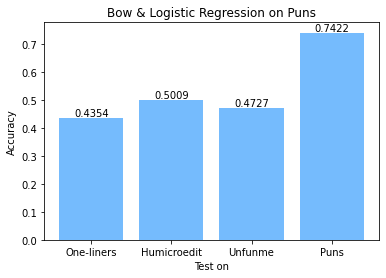

In [ ]:
#accuracy
index = np.arange(4)
values = [0.435,0.501,0.473,0.742]


plt.title('Bow & Logistic Regression on Puns')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

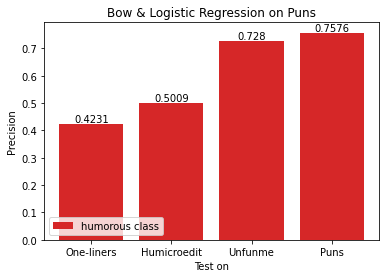

In [ ]:
#precision
index = np.arange(4)
values = [0.423,0.501,0.728,0.758]


plt.title('Bow & Logistic Regression on Puns')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

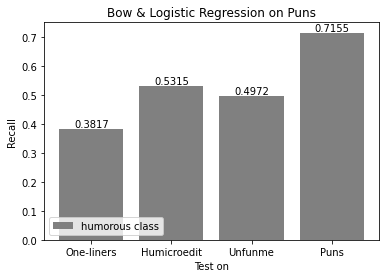

In [ ]:
#recall
index = np.arange(4)
values = [0.382,0.531,0.497,0.715]


plt.title('Bow & Logistic Regression on Puns')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

# Word2vec & Logistic regression

Второй подход: __Word2Vec & Logistic Regression__. Обучение и тесты на всех исходных множествах.

В качестве эмбеддингов мы будем использовать векторные представления слов из __Word2vec__, так как они отображают семантическую близость между словами, а не важность конкретных слов в документе. Классификатор для сравнения такой же - Логистическая Регрессия.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', random_state=40)

#### Word2vec

Для начала скачаем саму предобученную модель эмбеддингов.

In [ ]:
import gensim
from gensim.models import word2vec
import urllib.request

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2021-05-13 09:37:07--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.6
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/root/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  78.6MB/s    in 20s     

2021-05-13 09:37:27 (77.1 MB/s) - ‘/root/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
word2vec_path = "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
w2v = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

Обозначим эмбеддинг текста как усреднение содержащихся в нём слов:

In [ ]:
#получение эмбеддингов для одного текста
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

#получение эмбеддингов для всего множества
def get_word2vec_embeddings(vectors, clean_questions_tokens, generate_missing=False):
    embeddings = clean_questions_tokens.apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

### Train on One-Liners

Word2Vec готова! Теперь обучим на каждом множестве и протестируем поочерёдно на других, как в __BOW & LR__.

In [ ]:
#токенизация для Word2Vec 
oneline_tokens = pd.concat([clean_train_oneline["tokens"], clean_test_oneline["tokens"]])

In [ ]:
#классы документов
oneline_labels = pd.concat([clean_train_oneline["label"], clean_test_oneline["label"]])

In [ ]:
#сами документы
oneline_texts = pd.concat([clean_train_oneline["text"], clean_test_oneline["text"]])

In [ ]:
#метод разбиения на необходимые выборки
from sklearn.model_selection import train_test_split

In [ ]:
#получаем эмбеддинги и разбиваем, как необходимо
embeddings_oneline = get_word2vec_embeddings(w2v, oneline_tokens)
X_train_oneline_w2v, X_test_oneline_w2v, y_train_oneline_w2v, y_test_oneline_w2v = train_test_split(embeddings_oneline, oneline_labels, 
                                                                    test_size=0.2, random_state=40)

In [ ]:
embedding_w2v_oneline = embeddings_oneline

In [ ]:
classifier = lr_classifier

In [ ]:
#обучение и предсказание на том же множестве
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v)
w2v_oneline_y_predict = classifier.predict(X_test_oneline_w2v)

In [ ]:
w2v_oneline_y_predict = pd.Series(w2v_oneline_y_predict) #очистка от лишних точек с запятой
w2v_oneline_y_predict = cleanse_semicolon(w2v_oneline_y_predict)

In [ ]:
y_test_oneline_w2v = pd.Series(y_test_oneline_w2v)
y_test_oneline_w2v = cleanse_semicolon(y_test_oneline_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v, w2v_oneline_y_predict)
print("Word2vec & Logistic regression\nTrain on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: One-liners  Test on: One-liners 
accuracy = 0.762, precision = 0.756, recall = 0.761, f1 = 0.762
Precision and recall on humorous class


In [ ]:
oneliners_w2v = get_metrics_adversarial(y_test_oneline_w2v, w2v_oneline_y_predict)
print("W2V\nTrain on: One-liners  Test on: One-liners \nPercent of misclassified non-humorous texts = %.3f%%\n" % (oneliners_w2v))

W2V
Train on: One-liners  Test on: One-liners 
Percent of misclassified non-humorous texts = 23.776%



### Train on Humicroedit

In [ ]:
humicro_tokens = pd.concat([clean_train_humicro["tokens"], clean_test_humicro["tokens"]])

In [ ]:
humicro_labels = pd.concat([clean_train_humicro["label"], clean_test_humicro["label"]])

In [ ]:
humicro_texts = pd.concat([clean_train_humicro["text"], clean_test_humicro["text"]])

In [ ]:
embeddings_humicro = get_word2vec_embeddings(w2v, humicro_tokens)
X_train_humicro_w2v, X_test_humicro_w2v, y_train_humicro_w2v, y_test_humicro_w2v = train_test_split(embeddings_humicro, humicro_labels, 
                                                                    test_size=0.2, random_state=40)

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_y_predict = classifier.predict(X_test_humicro_w2v)

In [ ]:
w2v_humicro_y_predict = pd.Series(w2v_humicro_y_predict)
w2v_humicro_y_predict = cleanse_semicolon(w2v_humicro_y_predict)

In [ ]:
y_test_humicro_w2v = pd.Series(y_test_humicro_w2v)
y_test_humicro_w2v = cleanse_semicolon(y_test_humicro_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v, w2v_humicro_y_predict)
print("Word2vec & Logistic regression\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.773, precision = 0.776, recall = 0.770, f1 = 0.773
Precision and recall on humorous class


In [ ]:
humicro_w2v = get_metrics_adversarial(y_test_humicro_w2v, w2v_humicro_y_predict)
print("W2V\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of misclassified non-humorous texts = %.3f%%\n" % (humicro_w2v))

W2V
Train on: Humicroedit  Test on: Humicroedit 
Percent of misclassified non-humorous texts = 22.330%



### Train on Unfunme

In [ ]:
unfun_tokens = pd.concat([clean_train_unfun["tokens"], clean_test_unfun["tokens"]])

In [ ]:
unfun_labels = pd.concat([clean_train_unfun["label"], clean_test_unfun["label"]])

In [ ]:
unfun_texts = pd.concat([clean_train_unfun["text"], clean_test_unfun["text"]])

In [ ]:
embeddings_unfun = get_word2vec_embeddings(w2v, unfun_tokens)
X_train_unfun_w2v, X_test_unfun_w2v, y_train_unfun_w2v, y_test_unfun_w2v = train_test_split(embeddings_unfun, unfun_labels, 
                                                                    test_size=0.2, random_state=40)

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_y_predict = classifier.predict(X_test_unfun_w2v)

In [ ]:
w2v_unfun_y_predict = pd.Series(w2v_unfun_y_predict)
w2v_unfun_y_predict = cleanse_semicolon(w2v_unfun_y_predict)

In [ ]:
y_test_unfun_w2v = pd.Series(y_test_unfun_w2v)
y_test_unfun_w2v = cleanse_semicolon(y_test_unfun_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v, w2v_unfun_y_predict)
print("Word2vec & Logistic regression\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.621, precision = 0.823, recall = 0.642, f1 = 0.648
Precision and recall on humorous class


In [ ]:
unfun_w2v = get_metrics_adversarial(y_test_unfun_w2v, w2v_unfun_y_predict)
print("W2V\nTrain on: Unfunme  Test on: Unfunme \nPercent of misclassified non-humorous texts = %.3f%%\n" % (unfun_w2v))

W2V
Train on: Unfunme  Test on: Unfunme 
Percent of misclassified non-humorous texts = 44.633%



### Train on PUNS

In [ ]:
puns_tokens = pd.concat([clean_train_puns["tokens"], clean_test_puns["tokens"]])

In [ ]:
puns_labels = pd.concat([clean_train_puns["label"], clean_test_puns["label"]])

In [ ]:
puns_texts = pd.concat([clean_train_puns["text"], clean_test_puns["text"]])

In [ ]:
embeddings_puns = get_word2vec_embeddings(w2v, puns_tokens)
X_train_puns_w2v, X_test_puns_w2v, y_train_puns_w2v, y_test_puns_w2v = train_test_split(embeddings_puns, puns_labels, 
                                                                    test_size=0.2, random_state=40)

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_y_predict = classifier.predict(X_test_puns_w2v)

In [ ]:
w2v_puns_y_predict = pd.Series(w2v_puns_y_predict)
w2v_puns_y_predict = cleanse_semicolon(w2v_puns_y_predict)

In [ ]:
y_test_puns_w2v = pd.Series(y_test_puns_w2v)
y_test_puns_w2v = cleanse_semicolon(y_test_puns_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v, w2v_puns_y_predict)
print("Word2vec & Logistic regression\nTrain on: PUNS  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: PUNS  Test on: PUNS 
accuracy = 0.794, precision = 0.797, recall = 0.799, f1 = 0.794
Precision and recall on humorous class


In [ ]:
puns_w2v = get_metrics_adversarial(y_test_puns_w2v, w2v_puns_y_predict)
print("W2V\nTrain on: Puns  Test on: Puns \nPercent of misclassified non-humorous texts = %.3f%%\n" % (puns_w2v))

W2V
Train on: Puns  Test on: Puns 
Percent of misclassified non-humorous texts = 21.053%



### Кросс-оценка

Эмбеддинги __Word2vec__ получены для всех множеств. Теперь протестируем обученные модели с помощью кросс-оценки.

#### Train: One-liners
#### Test: Humicroedit

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v) #обучение на старом множестве
w2v_oneline_test_humicro_y_predict = classifier.predict(X_test_humicro_w2v) #предсказание на новом множестве

In [ ]:
w2v_oneline_test_humicro_y_predict = pd.Series(w2v_oneline_test_humicro_y_predict) #обработка от лишних знаков препинания
w2v_oneline_test_humicro_y_predict = cleanse_semicolon(w2v_oneline_test_humicro_y_predict)

In [ ]:
y_test_humicro_w2v = pd.Series(y_test_humicro_w2v)
y_test_humicro_w2v = cleanse_semicolon(y_test_humicro_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v, w2v_oneline_test_humicro_y_predict)
print("Word2vec & Logistic regression\nTrain on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: One-liners  Test on: Humicroedit 
accuracy = 0.553, precision = 0.604, recall = 0.313, f1 = 0.526
Precision and recall on humorous class


#### Train: One-liners
#### Test: Unfunme

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v)
w2v_oneline_test_unfun_y_predict = classifier.predict(X_test_unfun_w2v)

In [ ]:
w2v_oneline_test_unfun_y_predict = pd.Series(w2v_oneline_test_unfun_y_predict)
w2v_oneline_test_unfun_y_predict = cleanse_semicolon(w2v_oneline_test_unfun_y_predict)

In [ ]:
y_test_unfun_w2v = pd.Series(y_test_unfun_w2v)
y_test_unfun_w2v = cleanse_semicolon(y_test_unfun_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v, w2v_oneline_test_unfun_y_predict)
print("Word2vec & Logistic regression\nTrain on: One-liners  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: One-liners  Test on: Unfunme 
accuracy = 0.551, precision = 0.819, recall = 0.529, f1 = 0.584
Precision and recall on humorous class


#### Train: One-liners
#### Test: PUNS

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v)
w2v_oneline_test_puns_y_predict = classifier.predict(X_test_puns_w2v)

In [ ]:
w2v_oneline_test_puns_y_predict = pd.Series(w2v_oneline_test_puns_y_predict)
w2v_oneline_test_puns_y_predict = cleanse_semicolon(w2v_oneline_test_puns_y_predict)

In [ ]:
y_test_puns_w2v = pd.Series(y_test_puns_w2v)
y_test_puns_w2v = cleanse_semicolon(y_test_puns_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v, w2v_oneline_test_puns_y_predict)
print("Word2vec & Logistic regression\nTrain on: One-liners  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: One-liners  Test on: PUNS 
accuracy = 0.458, precision = 0.473, recall = 0.570, f1 = 0.451
Precision and recall on humorous class


#### Графики One-Liners

Теперь построим сравнительные графики для каждого обучающего множества. Полный анализ можно увидеть в Главе II и III.

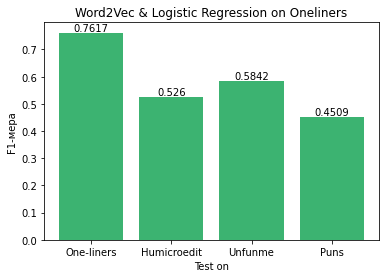

In [ ]:
#F1
index = np.arange(4)
values = [0.762,0.526,0.584,0.451]

plt.title('Word2Vec & Logistic Regression on Oneliners')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

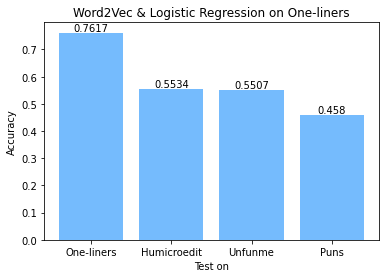

In [ ]:
#accuracy
index = np.arange(4)
values = [0.762,0.553,0.551,0.458]
plt.title('Word2Vec & Logistic Regression on One-liners')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

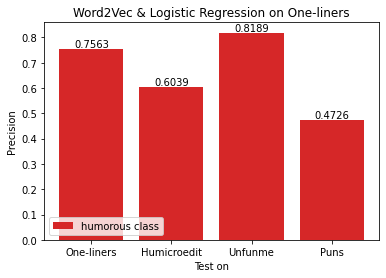

In [ ]:
#precision
index = np.arange(4)
values = [0.756,0.604,0.819,0.473]
plt.title('Word2Vec & Logistic Regression on One-liners')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

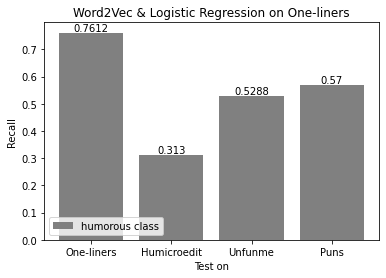

In [ ]:
#recall
index = np.arange(4)
values = [0.761,0.313,0.529,0.570]
plt.title('Word2Vec & Logistic Regression on One-liners')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### Train: Humicroedit
#### Test: One-liners

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_test_oneline_y_predict = classifier.predict(X_test_oneline_w2v)

In [ ]:
w2v_humicro_test_oneline_y_predict = pd.Series(w2v_humicro_test_oneline_y_predict)
w2v_humicro_test_oneline_y_predict = cleanse_semicolon(w2v_humicro_test_oneline_y_predict)

In [ ]:
y_test_oneline_w2v = pd.Series(y_test_oneline_w2v)
y_test_oneline_w2v = cleanse_semicolon(y_test_oneline_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v, w2v_humicro_test_oneline_y_predict)
print("Word2vec & Logistic regression\nTrain on: Humicroedit  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Humicroedit  Test on: One-liners 
accuracy = 0.583, precision = 0.562, recall = 0.691, f1 = 0.578
Precision and recall on humorous class


#### Train: Humicroedit
#### Test: Unfunme

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_test_unfun_y_predict = classifier.predict(X_test_unfun_w2v)

In [ ]:
w2v_humicro_test_unfun_y_predict = pd.Series(w2v_humicro_test_unfun_y_predict)
w2v_humicro_test_unfun_y_predict = cleanse_semicolon(w2v_humicro_test_unfun_y_predict)

In [ ]:
y_test_unfun_w2v = pd.Series(y_test_unfun_w2v)
y_test_unfun_w2v = cleanse_semicolon(y_test_unfun_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v, w2v_humicro_test_unfun_y_predict)
print("Word2vec & Logistic regression\nTrain on: Humicroedit  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Humicroedit  Test on: Unfunme 
accuracy = 0.656, precision = 0.786, recall = 0.756, f1 = 0.663
Precision and recall on humorous class


#### Train: Humicroedit
#### Test: PUNS

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_test_puns_y_predict = classifier.predict(X_test_puns_w2v)

In [ ]:
w2v_humicro_test_puns_y_predict = pd.Series(w2v_humicro_test_puns_y_predict)
w2v_humicro_test_puns_y_predict = cleanse_semicolon(w2v_humicro_test_puns_y_predict)

In [ ]:
y_test_puns_w2v = pd.Series(y_test_puns_w2v)
y_test_puns_w2v = cleanse_semicolon(y_test_puns_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v, w2v_humicro_test_puns_y_predict)
print("Word2vec & Logistic regression\nTrain on: Humicroedit  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Humicroedit  Test on: PUNS 
accuracy = 0.525, precision = 0.529, recall = 0.611, f1 = 0.522
Precision and recall on humorous class


#### Графики Humicroedit

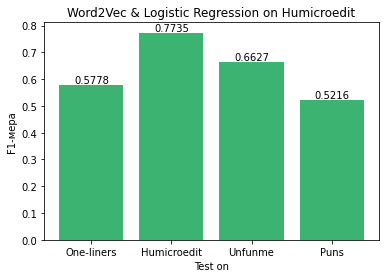

In [ ]:
#F1
index = np.arange(4)
values = [0.578,0.663,0.663,0.522]
plt.title('Word2Vec & Logistic Regression on Humicroedit')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

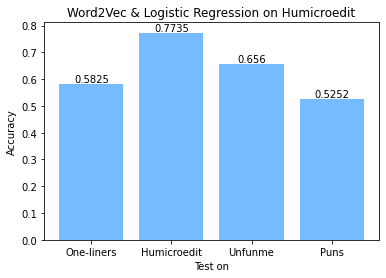

In [ ]:
#accuracy
index = np.arange(4)
values = [0.583,0.656,0.656,0.525]
plt.title('Word2Vec & Logistic Regression on Humicroedit')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

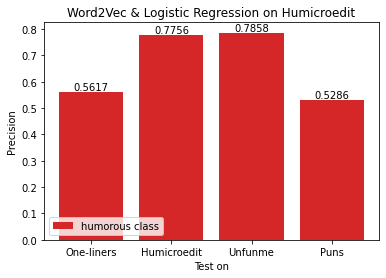

In [ ]:
#precision
index = np.arange(4)
values = [0.562,0.786,0.786,0.529]
plt.title('Word2Vec & Logistic Regression on Humicroedit')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

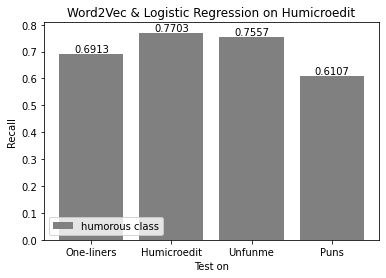

In [ ]:
#recall
index = np.arange(4)
values = [0.691,0.756,0.756,0.611]
plt.title('Word2Vec & Logistic Regression on Humicroedit')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### Train: Unfunme
#### Test: One-liners

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_test_oneline_y_predict = classifier.predict(X_test_oneline_w2v)

In [ ]:
w2v_unfun_test_oneline_y_predict = pd.Series(w2v_unfun_test_oneline_y_predict)
w2v_unfun_test_oneline_y_predict = cleanse_semicolon(w2v_unfun_test_oneline_y_predict)

In [ ]:
y_test_oneline_w2v = pd.Series(y_test_oneline_w2v)
y_test_oneline_w2v = cleanse_semicolon(y_test_oneline_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v, w2v_unfun_test_oneline_y_predict)
print("Word2vec & Logistic regression\nTrain on: Unfunme  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Unfunme  Test on: One-liners 
accuracy = 0.607, precision = 0.570, recall = 0.827, f1 = 0.588
Precision and recall on humorous class


#### Train: Unfunme
#### Test: Humicroedit

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_test_humicro_y_predict = classifier.predict(X_test_humicro_w2v)

In [ ]:
w2v_unfun_test_humicro_y_predict = pd.Series(w2v_unfun_test_humicro_y_predict)
w2v_unfun_test_humicro_y_predict = cleanse_semicolon(w2v_unfun_test_humicro_y_predict)

In [ ]:
y_test_humicro_w2v = pd.Series(y_test_humicro_w2v)
y_test_humicro_w2v = cleanse_semicolon(y_test_humicro_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v, w2v_unfun_test_humicro_y_predict)
print("Word2vec & Logistic regression\nTrain on: Unfunme  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Unfunme  Test on: Humicroedit 
accuracy = 0.500, precision = 0.501, recall = 0.533, f1 = 0.500
Precision and recall on humorous class


#### Train: Unfunme
#### Test: PUNS

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_test_puns_y_predict = classifier.predict(X_test_puns_w2v)

In [ ]:
w2v_unfun_test_puns_y_predict = pd.Series(w2v_unfun_test_puns_y_predict)
w2v_unfun_test_puns_y_predict = cleanse_semicolon(w2v_unfun_test_puns_y_predict)

In [ ]:
y_test_puns_w2v = pd.Series(y_test_puns_w2v)
y_test_puns_w2v = cleanse_semicolon(y_test_puns_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v, w2v_unfun_test_puns_y_predict)
print("Word2vec & Logistic regression\nTrain on: Unfunme  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: Unfunme  Test on: PUNS 
accuracy = 0.455, precision = 0.476, recall = 0.710, f1 = 0.416
Precision and recall on humorous class


#### Графики Unfunme

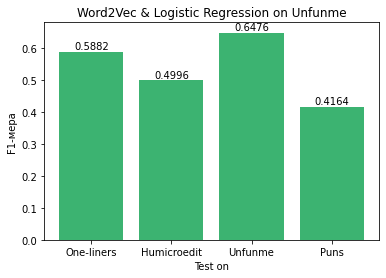

In [ ]:
#F1
index = np.arange(4)
values = [0.588,0.500,0.648,0.416]
plt.title('Word2Vec & Logistic Regression on Unfunme')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

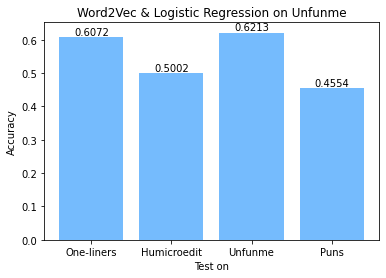

In [ ]:
#accuracy
index = np.arange(4)
values = [0.607,0.500,0.621,0.455]
plt.title('Word2Vec & Logistic Regression on Unfunme')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

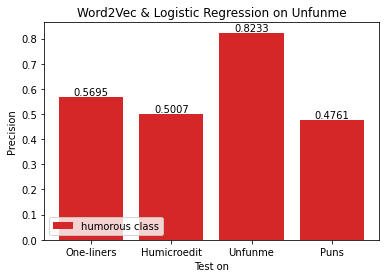

In [ ]:
#precision
index = np.arange(4)
values = [0.570,0.501,0.823,0.476]
plt.title('Word2Vec & Logistic Regression on Unfunme')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

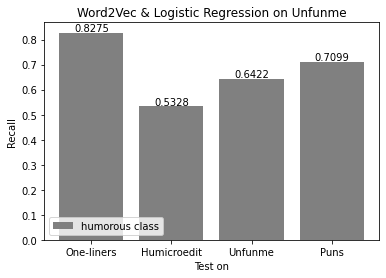

In [ ]:
#recall
index = np.arange(4)
values = [0.827,0.533,0.642,0.710]
plt.title('Word2Vec & Logistic Regression on Unfunme')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### Train: PUNS
#### Test: One-liners

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_test_oneline_y_predict = classifier.predict(X_test_oneline_w2v)

In [ ]:
w2v_puns_test_oneline_y_predict = pd.Series(w2v_puns_test_oneline_y_predict)
w2v_puns_test_oneline_y_predict = cleanse_semicolon(w2v_puns_test_oneline_y_predict)

In [ ]:
y_test_oneline_w2v = pd.Series(y_test_oneline_w2v)
y_test_oneline_w2v = cleanse_semicolon(y_test_oneline_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v, w2v_puns_test_oneline_y_predict)
print("Word2vec & Logistic regression\nTrain on: PUNS  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: PUNS  Test on: One-liners 
accuracy = 0.444, precision = 0.434, recall = 0.427, f1 = 0.443
Precision and recall on humorous class


#### Train: PUNS
#### Test: Humicroedit

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_test_humicro_y_predict = classifier.predict(X_test_humicro_w2v)

In [ ]:
w2v_puns_test_humicro_y_predict = pd.Series(w2v_puns_test_humicro_y_predict)
w2v_puns_test_humicro_y_predict = cleanse_semicolon(w2v_puns_test_humicro_y_predict)

In [ ]:
y_test_humicro_w2v = pd.Series(y_test_humicro_w2v)
y_test_humicro_w2v = cleanse_semicolon(y_test_humicro_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v, w2v_puns_test_humicro_y_predict)
print("Word2vec & Logistic regression\nTrain on: PUNS  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: PUNS  Test on: Humicroedit 
accuracy = 0.521, precision = 0.513, recall = 0.835, f1 = 0.468
Precision and recall on humorous class


#### Train: PUNS
#### Test: Unfunme

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_test_unfun_y_predict = classifier.predict(X_test_unfun_w2v)

In [ ]:
w2v_puns_test_unfun_y_predict = pd.Series(w2v_puns_test_unfun_y_predict)
w2v_puns_test_unfun_y_predict = cleanse_semicolon(w2v_puns_test_unfun_y_predict)

In [ ]:
y_test_unfun_w2v = pd.Series(y_test_unfun_w2v)
y_test_unfun_w2v = cleanse_semicolon(y_test_unfun_w2v)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v, w2v_puns_test_unfun_y_predict)
print("Word2vec & Logistic regression\nTrain on: PUNS  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Word2vec & Logistic regression
Train on: PUNS  Test on: Unfunme 
accuracy = 0.641, precision = 0.757, recall = 0.782, f1 = 0.634
Precision and recall on humorous class


#### Графики Puns

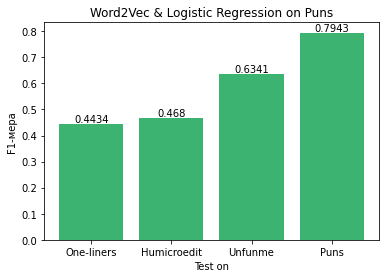

In [ ]:
#F1
index = np.arange(4)
values = [0.443,0.468,0.634,0.794]
plt.title('Word2Vec & Logistic Regression on Puns')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

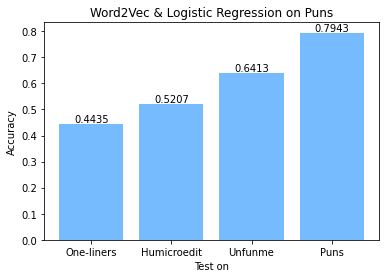

In [ ]:
#accuracy
index = np.arange(4)
values = [0.444,0.521,0.641,0.794]
plt.title('Word2Vec & Logistic Regression on Puns')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

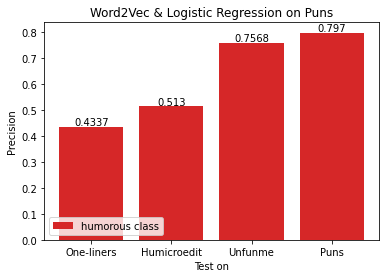

In [ ]:
#precision
index = np.arange(4)
values = [0.434,0.513,0.757,0.797]
plt.title('Word2Vec & Logistic Regression on Puns')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

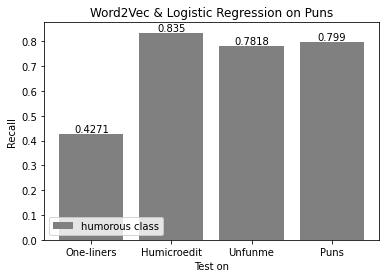

In [ ]:
#recall
index = np.arange(4)
values = [0.427,0.835,0.782,0.799]
plt.title('Word2Vec & Logistic Regression on Puns')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

# Universal Sentence Encoder & ClassifierDL

Третий подход: __Universal Sentence Encoder & ClassifierDL__. Обучение и тесты на всех исходных множествах.

Для классификации текста будет использована библиотека для обработки естественного языка __SparkNLP__. Эмбеддинги предложений получены путем __Universal Sentence Encoder__, а в качестве модели выступит __ClassifierDL__.

In [ ]:
!pip install sparknlp #необходимая установка модулей sparknlp и pyspark

In [ ]:
import numpy as np #нужные библиотеки
import sparknlp
from sparknlp.annotator import *
from sparknlp.base import *
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from sparknlp.pretrained import PretrainedPipeline

In [ ]:
spark=sparknlp.start() #запускаем sparknlp

__DocumentAssembler__ преобразует *Dataframe* в нужный тип данных *document*

In [ ]:
document = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

In [ ]:
#Universal Sentence Encoder используется уже предобученный
use = UniversalSentenceEncoder.pretrained()\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]


__ClassifierDL__

Параметры: 20 эпох

In [ ]:
#инициализация самого классификатора - получает на вход эмбеддинги, выводит классы, которые можно сравнить с исходными
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("label")\
    .setMaxEpochs(20)\
    .setEnableOutputLogs(True)\
    .setLr(0.004)\

In [ ]:
#pipeline - порядок действий. Из Dataframe в документ, из документа векторные представления, из представлений - классификация
humor_pipeline = Pipeline(
    stages = [
        document,
        use,
        classsifierdl
    ])

Инициализация всех необходимых компонентов прошла успешно. Теперь начнём аналогичные прошлым методам операции.

### Train on One-liners

In [ ]:
train_oneliners_dl = spark.read \ #обучающее множество
      .option("sep", ",") \
      .option("header", True) \
      .csv("train_oneliners.csv")

In [ ]:
test_oneliners_dl = spark.read \ #тестовое множество
      .option("header", True) \
      .csv("test_oneliners.csv")

#### Предобработка - избавление от лишних символов и нулевых значений

In [ ]:
train_oneliners_dl

DataFrame[text: string,  label;;: string]

In [ ]:
#Убираем ненужные знаки пунктуации. Заметьте, что токенизации и другой предобработки не производится! Мы лишь убираем особенности кодировки датасета.
train_oneliners_dl = train_oneliners_dl.select(F.regexp_replace(F.col(' label;;'), ";;", "").alias('label'),F.col("text").alias('text'))

In [ ]:
train_oneliners_dl = train_oneliners_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
train_oneliners_dl = train_oneliners_dl.select(F.regexp_replace(F.col('label'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
train_oneliners_dl.groupby("label")\ #смотрим на предмет нулевых значений
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|        null|  174|
|    humorous| 9426|
|non-humorous| 9600|
+------------+-----+



In [ ]:
train_oneliners_dl= train_oneliners_dl.na.drop(how="any") #удаляем нулевые значения. Все ОК!
train_oneliners_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|    humorous| 9426|
|non-humorous| 9600|
+------------+-----+



In [ ]:
test_oneliners_dl #та же процедура проводится и с тестовым множеством

DataFrame[text: string,  label;;;: string]

In [ ]:
test_oneliners_dl = test_oneliners_dl.select(F.regexp_replace(F.col(' label;;;'), ";;", "").alias('label'),F.col("text").alias('text'))

In [ ]:
test_oneliners_dl = test_oneliners_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
test_oneliners_dl = test_oneliners_dl.select(F.regexp_replace(F.col('label'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
test_oneliners_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|        null|   36|
|non-humorous| 3179|
|    humorous| 3185|
+------------+-----+



In [ ]:
test_oneliners_dl = test_oneliners_dl.na.drop(how="any")
test_oneliners_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous| 3179|
|    humorous| 3185|
+------------+-----+



#### Можно приступить к обучению!

In [ ]:
oneline_model = humor_pipeline.fit(train_oneliners_dl) #обучаем модель на исходных данных

In [ ]:
#получение предсказаний модели
oneline_prediction_df = oneline_model.transform(test_oneliners_dl).select("label", "text", "class.result").toPandas()

In [ ]:
#извлечение в удобный для сравнения тип данных - Dataframe
oneline_prediction_df['result'] = oneline_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_prediction_df['label'], oneline_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: One-liners 
accuracy = 0.850, precision = 0.847, recall = 0.855, f1 = 0.850
Precision and recall on humorous class


In [ ]:
oneliners_dl = get_metrics_adversarial(oneline_prediction_df['label'], oneline_prediction_df['result'])
print("W2V\nTrain on: One-liners  Test on: One-liners \nPercent of misclassified non-humorous texts = %.3f%%\n" % (oneliners_dl))

W2V
Train on: One-liners  Test on: One-liners 
Percent of misclassified non-humorous texts = 15.445%



### Train on Humicroedit

In [ ]:
train_humicro_dl = spark.read \
      .option("header", True) \
      .csv("train_humicro.csv")

In [ ]:
test_humicro_dl = spark.read \
      .option("header", True) \
      .csv("test_humicro.csv")

#### Предобработка - избавление от лишних символов и нулевых значений

In [ ]:
train_humicro_dl

DataFrame[text: string, label;: string]

In [ ]:
train_humicro_dl = train_humicro_dl.select(F.regexp_replace(F.col('label;'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
train_humicro_dl = train_humicro_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
train_humicro_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|        null|   48|
|non-humorous|16102|
|    humorous|16109|
+------------+-----+



In [ ]:
train_humicro_dl= train_humicro_dl.na.drop(how="any")
train_humicro_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|16102|
|    humorous|16109|
+------------+-----+



In [ ]:
test_humicro_dl

DataFrame[text: string, label;: string]

In [ ]:
test_humicro_dl = test_humicro_dl.select(F.regexp_replace(F.col('label;'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
test_humicro_dl = test_humicro_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
test_humicro_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|        null|   22|
|    humorous| 5366|
|non-humorous| 5366|
+------------+-----+



In [ ]:
test_humicro_dl= test_humicro_dl.na.drop(how="any")
test_humicro_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|    humorous| 5366|
|non-humorous| 5366|
+------------+-----+



#### Можно приступить к обучению!

In [ ]:
humicro_model = humor_pipeline.fit(train_humicro_dl)

In [ ]:
humicro_prediction_df = humicro_model.transform(test_humicro_dl).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_prediction_df['result'] = humicro_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_prediction_df['label'], humicro_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.903, precision = 0.902, recall = 0.903, f1 = 0.903
Precision and recall on humorous class


In [ ]:
humicro_dl = get_metrics_adversarial(humicro_prediction_df['label'], humicro_prediction_df['result'])
print("W2V\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of misclassified non-humorous texts = %.3f%%\n" % (humicro_dl))

W2V
Train on: Humicroedit  Test on: Humicroedit 
Percent of misclassified non-humorous texts = 10.194%



### Train on Unfunme

In [ ]:
train_unfun_dl = spark.read \
      .option("header", True) \
      .csv("train_unfunme.csv")

In [ ]:
test_unfun_dl = spark.read \
      .option("header", True) \
      .csv("test_unfunme.csv")

#### Предобработка - избавление от лишних символов и нулевых значений

In [ ]:
train_unfun_dl

DataFrame[text: string, label;: string]

In [ ]:
train_unfun_dl = train_unfun_dl.select(F.regexp_replace(F.col('label;'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
train_unfun_dl = train_unfun_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
train_unfun_dl.groupby("label")\ #Интересно, что в Unfunme совсем нет нулевых значений! Можно также заметить, что датасет несбалансирован
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  661|
|    humorous| 2155|
+------------+-----+



In [ ]:
test_unfun_dl

DataFrame[text: string, label;: string]

In [ ]:
test_unfun_dl = test_unfun_dl.select(F.regexp_replace(F.col('label;'), ";", "").alias('label'),F.col("text").alias('text'))

In [ ]:
test_unfun_dl = test_unfun_dl.select(F.regexp_replace(F.col('label'), '"', '').alias('label'),F.col("text").alias('text'))

In [ ]:
test_unfun_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  220|
|    humorous|  719|
+------------+-----+



#### Можно приступить к обучению!

In [ ]:
unfun_model = humor_pipeline.fit(train_unfun_dl)

In [ ]:
unfun_prediction_df = unfun_model.transform(test_unfun_dl).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_prediction_df['result'] = unfun_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_prediction_df['label'], unfun_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.766, precision = 0.766, recall = 1.000, f1 = 0.664
Precision and recall on humorous class


In [ ]:
unfun_dl = get_metrics_adversarial(unfun_prediction_df['label'], unfun_prediction_df['result'])
print("W2V\nTrain on: Unfunme  Test on: Unfunme \nPercent of misclassified non-humorous texts = %.3f%%\n" % (unfun_dl))

W2V
Train on: Unfunme  Test on: Unfunme 
Percent of misclassified non-humorous texts = 100.000%



Процент неправильно классифицированных текстов равен 100%! Об этом явлении в Главе V.

### Train on PUNS

In [ ]:
train_puns_dl = spark.read \
      .option("header", True) \
      .csv("train_puns.csv")

In [ ]:
test_puns_dl = spark.read \
      .option("header", True) \
      .csv("test_puns.csv")

#### Предобработка - избавление от лишних символов и нулевых значений

In [ ]:
train_puns_dl

DataFrame[text: string, label: string]

In [ ]:
train_puns_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous| 1442|
|    humorous| 1453|
+------------+-----+



In [ ]:
test_puns_dl

DataFrame[text: string, label: string]

In [ ]:
test_puns_dl.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  481|
|    humorous|  485|
+------------+-----+



#### Можно приступить к обучению!

In [ ]:
puns_model = humor_pipeline.fit(train_puns_dl)

In [ ]:
puns_prediction_df = puns_model.transform(test_puns_dl).select("label", "text", "class.result").toPandas()

In [ ]:
puns_prediction_df['result'] = puns_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_prediction_df['label'], puns_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: PUNS  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: PUNS  Test on: PUNS 
accuracy = 0.824, precision = 0.817, recall = 0.837, f1 = 0.824
Precision and recall on humorous class


In [ ]:
puns_dl = get_metrics_adversarial(puns_prediction_df['label'], puns_prediction_df['result'])
print("W2V\nTrain on: Puns  Test on: Puns \nPercent of misclassified non-humorous texts = %.3f%%\n" % (puns_dl))

W2V
Train on: Puns  Test on: Puns 
Percent of misclassified non-humorous texts = 18.919%



### Кросс-оценка

Предсказания и модели __USE & ClassifierDL__ получены для всех множеств. Теперь протестируем обученные модели с помощью кросс-оценки.

#### One-liners & Humicroedit

In [ ]:
#получение предсказаний на новом датасете
oneline_humicro_prediction_df = oneline_model.transform(test_humicro_dl).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_humicro_prediction_df['result'] = oneline_humicro_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_humicro_prediction_df['label'], oneline_humicro_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: Humicroedit 
accuracy = 0.587, precision = 0.641, recall = 0.395, f1 = 0.571
Precision and recall on humorous class


#### One-liners & Unfunme

In [ ]:
oneline_unfun_prediction_df = oneline_model.transform(test_unfun_dl).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_unfun_prediction_df['result'] = oneline_unfun_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_unfun_prediction_df['label'], oneline_unfun_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: Unfunme 
accuracy = 0.550, precision = 0.844, recall = 0.505, f1 = 0.582
Precision and recall on humorous class


#### One-liners & PUNS

In [ ]:
oneline_puns_prediction_df = oneline_model.transform(test_puns_dl).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_puns_prediction_df['result'] = oneline_puns_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_puns_prediction_df['label'], oneline_puns_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: PUNS 
accuracy = 0.567, precision = 0.551, recall = 0.748, f1 = 0.552
Precision and recall on humorous class


#### Графики One-Liners

Изобразим полученные результаты.

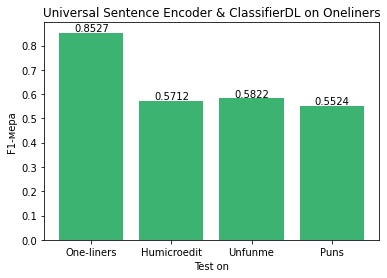

In [ ]:
#F1
index = np.arange(4)
values = [0.853,0.571,0.582,0.552]
plt.title('Universal Sentence Encoder & ClassifierDL on Oneliners')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

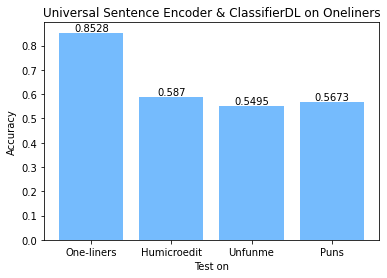

In [ ]:
#accuracy
index = np.arange(4)
values = [0.853,0.587,0.550,0.567]
plt.title('Universal Sentence Encoder & ClassifierDL on Oneliners')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

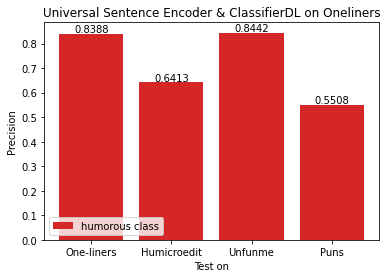

In [ ]:
#precision
index = np.arange(4)
values = [0.839,0.641,0.844,0.551]
plt.title('Universal Sentence Encoder & ClassifierDL on Oneliners')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

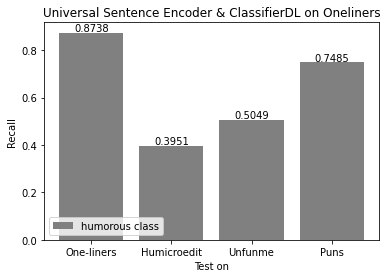

In [ ]:
#recall
index = np.arange(4)
values = [0.874,0.95,0.505,0.748]
plt.title('Universal Sentence Encoder & ClassifierDL on Oneliners')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### Humicroedit & One-liners

In [ ]:
humicro_oneline_prediction_df = humicro_model.transform(test_oneliners_dl).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_oneline_prediction_df['result'] = humicro_oneline_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_oneline_prediction_df['label'], humicro_oneline_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: One-liners 
accuracy = 0.643, precision = 0.609, recall = 0.798, f1 = 0.634
Precision and recall on humorous class


#### Humicroedit & Unfunme

In [ ]:
humicro_unfun_prediction_df = humicro_model.transform(test_unfun_dl).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_unfun_prediction_df['result'] = humicro_unfun_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_unfun_prediction_df['label'], humicro_unfun_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: Unfunme 
accuracy = 0.651, precision = 0.759, recall = 0.797, f1 = 0.639
Precision and recall on humorous class


#### Humicroedit & PUNS

In [ ]:
humicro_puns_prediction_df = humicro_model.transform(test_puns_dl).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_puns_prediction_df['result'] = humicro_puns_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_puns_prediction_df['label'], humicro_puns_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: PUNS 
accuracy = 0.474, precision = 0.483, recall = 0.674, f1 = 0.452
Precision and recall on humorous class


#### Графики Humicroedit

Изобразим полученные результаты.

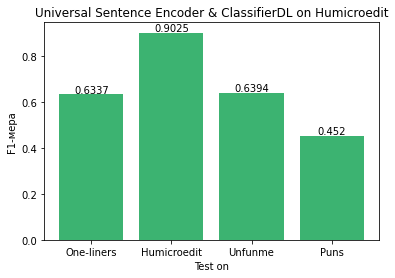

In [ ]:
#F1
index = np.arange(4)
values = [0.634,0.903,0.6389,0.452]
plt.title('Universal Sentence Encoder & ClassifierDL on Humicroedit')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

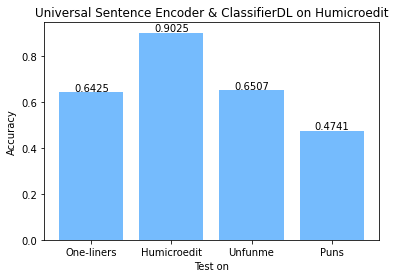

In [ ]:
#accuracy
index = np.arange(4)
values = [0.643,0.903,0.651,0.474]
plt.title('Universal Sentence Encoder & ClassifierDL on Humicroedit')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

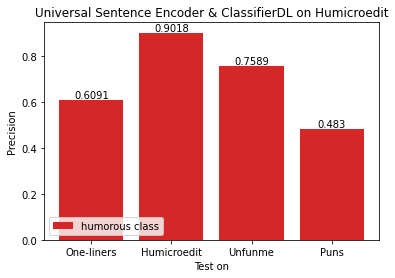

In [ ]:
#precision
index = np.arange(4)
values = [0.609,0.902,0.759,0.483]
plt.title('Universal Sentence Encoder & ClassifierDL on Humicroedit')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

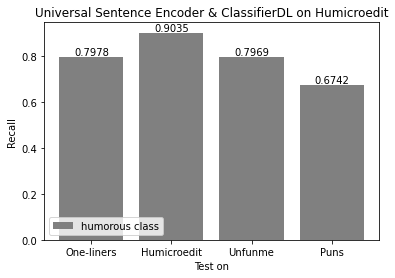

In [ ]:
#recall
index = np.arange(4)
values = [0.798,0.903,0.797,0.674]
plt.title('Universal Sentence Encoder & ClassifierDL on Humicroedit')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### Unfunme & One-liners

In [ ]:
unfun_oneline_prediction_df = unfun_model.transform(test_oneliners_dl).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_oneline_prediction_df['result'] = unfun_oneline_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_oneline_prediction_df['label'], unfun_oneline_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: One-liners 
accuracy = 0.500, precision = 0.500, recall = 1.000, f1 = 0.334
Precision and recall on humorous class


#### Unfunme & Humicroedit

In [ ]:
unfun_humicro_prediction_df = unfun_model.transform(test_humicro_dl).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_humicro_prediction_df['result'] = unfun_humicro_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_humicro_prediction_df['label'], unfun_humicro_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: Humicroedit 
accuracy = 0.500, precision = 0.500, recall = 1.000, f1 = 0.333
Precision and recall on humorous class


#### Unfunme & PUNS

In [ ]:
unfun_puns_prediction_df = unfun_model.transform(test_puns_dl).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_puns_prediction_df['result'] = unfun_puns_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_puns_prediction_df['label'], unfun_puns_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: PUNS \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: PUNS 
accuracy = 0.502, precision = 0.502, recall = 1.000, f1 = 0.336
Precision and recall on humorous class


#### Графики Unfunme

Изобразим полученные результаты.

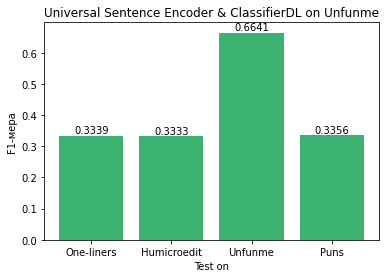

In [ ]:
#F1
index = np.arange(4)
values = [0.334,0.333,0.664,0.336]
plt.title('Universal Sentence Encoder & ClassifierDL on Unfunme')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

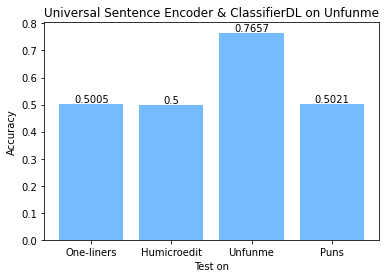

In [ ]:
#accuracy
index = np.arange(4)
values = [0.500,0.500,0.766,0.502]
plt.title('Universal Sentence Encoder & ClassifierDL on Unfunme')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

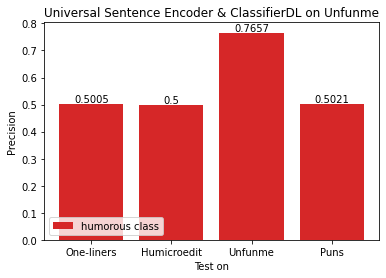

In [ ]:
#precision
index = np.arange(4)
values = [0.500,0.500,0.766,0.502]
plt.title('Universal Sentence Encoder & ClassifierDL on Unfunme')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

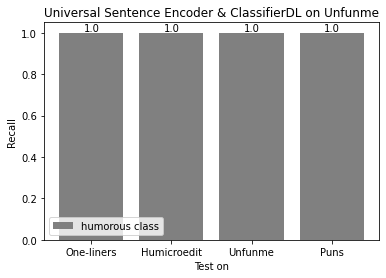

In [ ]:
#recall
index = np.arange(4)
values = [1.000,1.000,1.000,1.000]
plt.title('Universal Sentence Encoder & ClassifierDL on Unfunme')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

#### PUNS & One-liners

In [ ]:
puns_oneline_prediction_df = puns_model.transform(test_oneliners_dl).select("label", "text", "class.result").toPandas()

In [ ]:
puns_oneline_prediction_df['result'] = puns_oneline_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_oneline_prediction_df['label'], puns_oneline_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: PUNS  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: PUNS  Test on: One-liners 
accuracy = 0.508, precision = 0.511, recall = 0.425, f1 = 0.505
Precision and recall on humorous class


#### PUNS & Humicroedit

In [ ]:
puns_humicro_prediction_df = puns_model.transform(test_humicro_dl).select("label", "text", "class.result").toPandas()

In [ ]:
puns_humicro_prediction_df['result'] = puns_humicro_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_humicro_prediction_df['label'], puns_humicro_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: PUNS  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: PUNS  Test on: Humicroedit 
accuracy = 0.497, precision = 0.498, recall = 0.616, f1 = 0.490
Precision and recall on humorous class


#### PUNS & Unfunme

In [ ]:
puns_unfun_prediction_df = puns_model.transform(test_unfun_dl).select("label", "text", "class.result").toPandas()

In [ ]:
puns_unfun_prediction_df['result'] = puns_unfun_prediction_df['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_unfun_prediction_df['label'], puns_unfun_prediction_df['result'])
print("Universal Sentence Encoder & ClassifierDL\nTrain on: PUNS  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Universal Sentence Encoder & ClassifierDL
Train on: PUNS  Test on: Unfunme 
accuracy = 0.567, precision = 0.787, recall = 0.595, f1 = 0.598
Precision and recall on humorous class


#### Графики Puns

Изобразим полученные результаты.

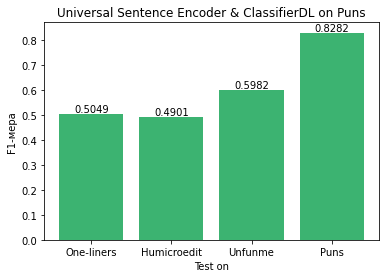

In [ ]:
#F1
index = np.arange(4)
values = [0.505,0.490,0.598,0.828]
plt.title('Universal Sentence Encoder & ClassifierDL on Puns')
plt.bar(index, values, color="mediumseagreen")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('F1-мера')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

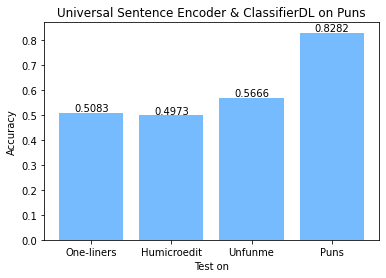

In [ ]:
#accuracy
index = np.arange(4)
values = [0.508,0.497,0.567,0.828]
plt.title('Universal Sentence Encoder & ClassifierDL on Puns')
plt.bar(index, values, color="xkcd:sky blue")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.ylabel('Accuracy')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

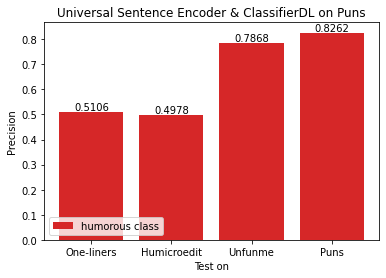

In [ ]:
#precision
index = np.arange(4)
values = [0.511,0.498,0.787,0.826]
plt.title('Universal Sentence Encoder & ClassifierDL on Puns')
plt.bar(index, values, color="tab:red")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

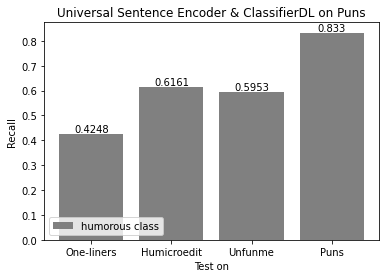

In [ ]:
#recall
index = np.arange(4)
values = [0.425,0.616,0.595,0.833]
plt.title('Universal Sentence Encoder & ClassifierDL on Puns')
plt.bar(index, values, color="gray")
plt.xticks(index, ['One-liners','Humicroedit','Unfunme','Puns'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Test on")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


plt.show()

# Графики для сравнительного анализа

Графики сравнения показателей __BOW & LR__, __Word2Vec & LR__ и __USE & ClassifierDL__ на всех множествах.

Для начала сравним результаты моделей на каждом датасете отдельно.

### One-liners

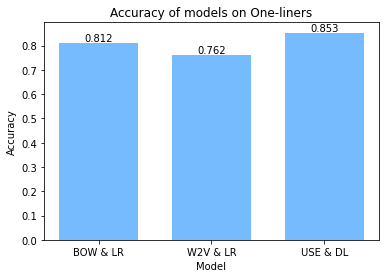

In [ ]:
#accuracy
index = np.arange(3)
values = [0.812, 0.762, 0.853]
plt.title('Accuracy of models on One-liners')
plt.bar(index, values, color="xkcd:sky blue", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('Accuracy')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


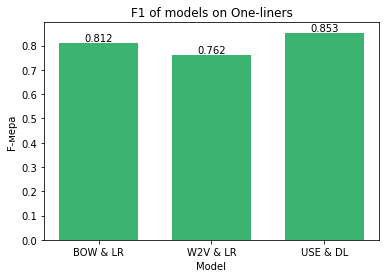

In [ ]:
#f1
index = np.arange(3)
values = [0.812, 0.762, 0.853]
plt.title('F1 of models on One-liners')
plt.bar(index, values, color="mediumseagreen", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('F-мера')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


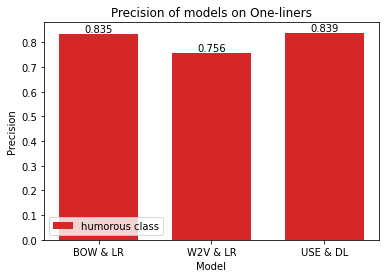

In [ ]:
#precision
index = np.arange(3)
values = [0.835, 0.756, 0.839]
plt.title('Precision of models on One-liners')
plt.bar(index, values, color="tab:red", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


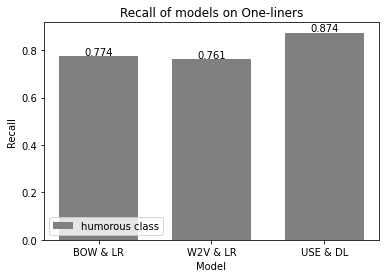

In [ ]:
#recall
index = np.arange(3)
values = [0.774, 0.761, 0.874]
plt.title('Recall of models on One-liners')
plt.bar(index, values, color="grey", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


### Humicroedit

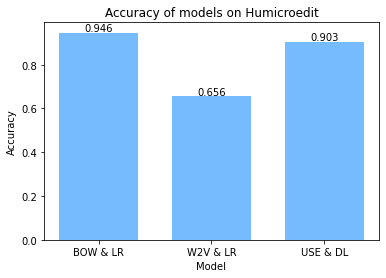

In [ ]:
#accuracy
index = np.arange(3)
values = [0.946, 0.656, 0.903]
plt.title('Accuracy of models on Humicroedit')
plt.bar(index, values, color="xkcd:sky blue", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('Accuracy')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


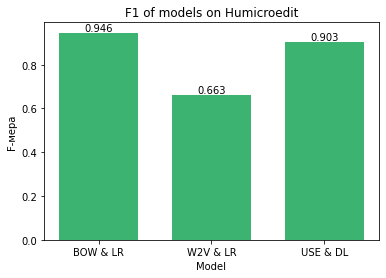

In [ ]:
#f1
index = np.arange(3)
values = [0.946, 0.663, 0.903]
plt.title('F1 of models on Humicroedit')
plt.bar(index, values, color="mediumseagreen", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('F-мера')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


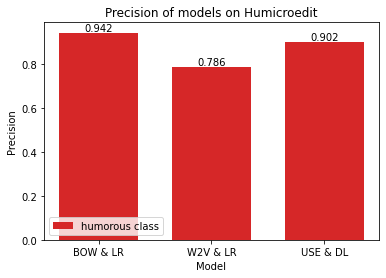

In [ ]:
#precision
index = np.arange(3)
values = [0.942, 0.786, 0.902]
plt.title('Precision of models on Humicroedit')
plt.bar(index, values, color="tab:red", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


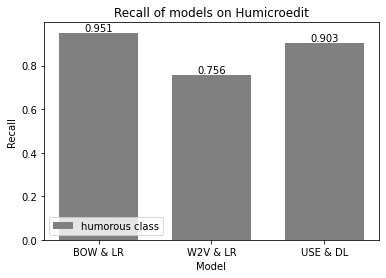

In [ ]:
#recall
index = np.arange(3)
values = [0.951, 0.756, 0.903]
plt.title('Recall of models on Humicroedit')
plt.bar(index, values, color="grey", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


### Unfunme

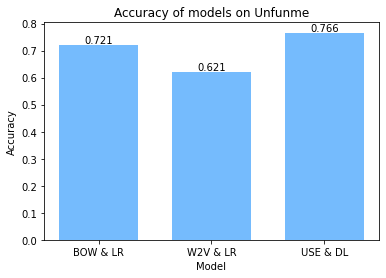

In [ ]:
#accuracy
index = np.arange(3)
values = [0.721, 0.621, 0.766]
plt.title('Accuracy of models on Unfunme')
plt.bar(index, values, color="xkcd:sky blue", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('Accuracy')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


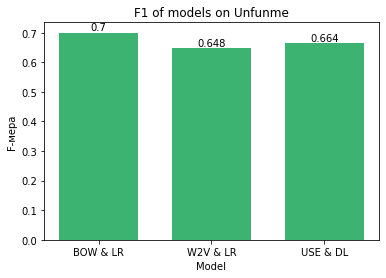

In [ ]:
#f1
index = np.arange(3)
values = [0.700, 0.648, 0.664]
plt.title('F1 of models on Unfunme')
plt.bar(index, values, color="mediumseagreen", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('F-мера')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


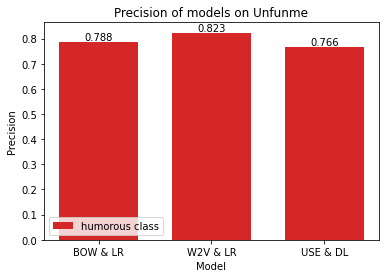

In [ ]:
#precision
index = np.arange(3)
values = [0.788, 0.823, 0.766]
plt.title('Precision of models on Unfunme')
plt.bar(index, values, color="tab:red", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


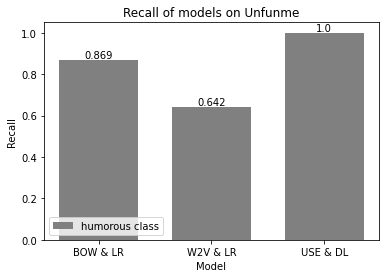

In [ ]:
#recall
index = np.arange(3)
values = [0.869, 0.642, 1.000]
plt.title('Recall of models on Unfunme')
plt.bar(index, values, color="grey", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


### Puns

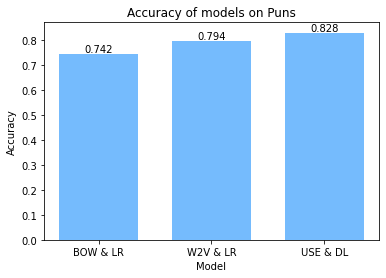

In [ ]:
#accuracy
index = np.arange(3)
values = [0.742, 0.794, 0.828]
plt.title('Accuracy of models on Puns')
plt.bar(index, values, color="xkcd:sky blue", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('Accuracy')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


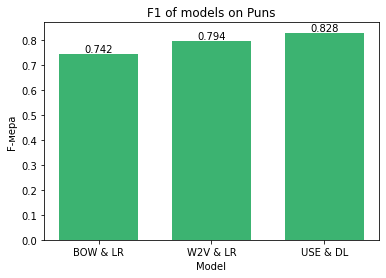

In [ ]:
#f1
index = np.arange(3)
values = [0.742, 0.794, 0.828]
plt.title('F1 of models on Puns')
plt.bar(index, values, color="mediumseagreen", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.ylabel('F-мера')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


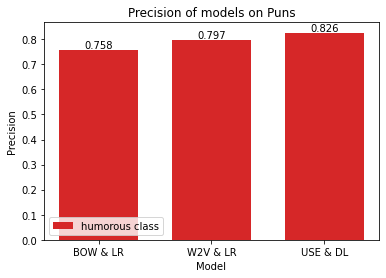

In [ ]:
#precision
index = np.arange(3)
values = [0.758, 0.797, 0.826]
plt.title('Precision of models on Puns')
plt.bar(index, values, color="tab:red", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


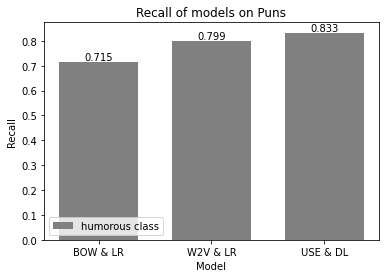

In [ ]:
#recall
index = np.arange(3)
values = [0.715, 0.799, 0.833]
plt.title('Recall of models on Puns')
plt.bar(index, values, color="grey", width=0.7)
plt.xticks(index, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(['humorous class'], loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

for i, perf in enumerate(values):
    plt.text(i, perf + .007, round(perf, 4), color='black', 
            ha='center')


### Дополнительные графики

Теперь построим общий график на всех множествах для каждой метрики качества.

Text(0.5, 0, 'Model')

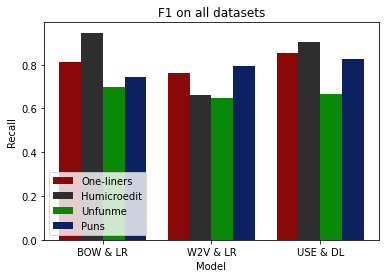

In [ ]:
#F1 on all datasets
index = np.arange(3)
puns_f1 = [0.742, 0.794, 0.828]
unfunme_f1 = [0.700, 0.648, 0.664]
one_f1 = [0.812, 0.762, 0.853]
humicro_f1 = [0.946, 0.663, 0.903]
width = 0.2
plt.title('F1 on all datasets')
#для каждого множества отдельный цвет
plt.bar(index, one_f1, label = 'One-liners', color="#8A0808", width=0.2)
plt.bar(index + width, humicro_f1, label='Humicroedit', color="#2E2E2E", width=0.2)
plt.bar(index + 2* width, unfunme_f1, label='Unfunme', color="#088A08", width=0.2)
plt.bar(index + 3 * width, puns_f1, label = 'Puns', color="#0B2161", width=0.2)

plt.xticks(index + width + width/2, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

Text(0.5, 0, 'Model')

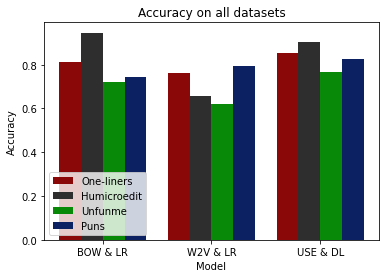

In [ ]:
#accuracy on all datasets
index = np.arange(3)
puns_acc = [0.742, 0.794, 0.828]
unfunme_acc = [0.721, 0.621, 0.766]
one_acc = [0.812, 0.762, 0.853]
humicro_acc = [0.946, 0.656, 0.903]
width = 0.2
plt.title('Accuracy on all datasets')

plt.bar(index, one_acc, label = 'One-liners', color="#8A0808", width=0.2)
plt.bar(index + width, humicro_acc, label='Humicroedit', color="#2E2E2E", width=0.2)
plt.bar(index + 2* width, unfunme_acc, label='Unfunme', color="#088A08", width=0.2)
plt.bar(index + 3 * width, puns_acc, label = 'Puns', color="#0B2161", width=0.2)

plt.xticks(index + width + width/2, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel("Model")

Text(0.5, 0, 'Model')

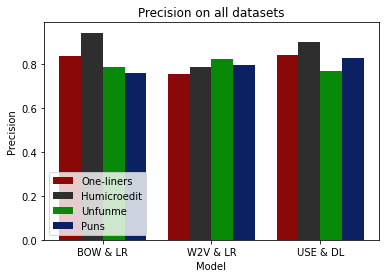

In [ ]:
#precision on all datasets
index = np.arange(3)
puns_prec = [0.758, 0.797, 0.826]
unfunme_prec = [0.788, 0.823, 0.766]
one_prec = [0.835, 0.756, 0.839]
humicro_prec = [0.942, 0.786, 0.902]
width = 0.2
plt.title('Precision on all datasets')
plt.bar(index, one_prec, label = 'One-liners', color="#8A0808", width=0.2)
plt.bar(index + width, humicro_prec, label='Humicroedit', color="#2E2E2E", width=0.2)
plt.bar(index + 2* width, unfunme_prec, label='Unfunme', color="#088A08", width=0.2)
plt.bar(index + 3 * width, puns_prec, label = 'Puns', color="#0B2161", width=0.2)
plt.xticks(index + width + width/2, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(loc='lower left')
plt.ylabel('Precision')
plt.xlabel("Model")

Text(0.5, 0, 'Model')

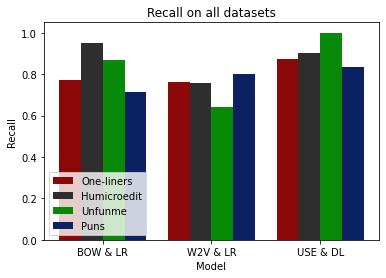

In [ ]:
#recall on all datasets
index = np.arange(3)
puns_rec = [0.715, 0.799, 0.833]
unfunme_rec = [0.869, 0.642, 1.000]
one_rec = [0.774, 0.761, 0.874]
humicro_rec = [0.951, 0.756, 0.903]
width = 0.2
plt.title('Recall on all datasets')
plt.bar(index, one_rec, label = 'One-liners', color="#8A0808", width=0.2)
plt.bar(index + width, humicro_rec, label='Humicroedit', color="#2E2E2E", width=0.2)
plt.bar(index + 2* width, unfunme_rec, label='Unfunme', color="#088A08", width=0.2)
plt.bar(index + 3 * width, puns_rec, label = 'Puns', color="#0B2161", width=0.2)
plt.xticks(index + width + width/2, ['BOW & LR','W2V & LR','USE & DL'])
plt.legend(loc='lower left')
plt.ylabel('Recall')
plt.xlabel("Model")

# Состязательные атаки

Для каждой модели мы будем пытаться "обмануть" классификатор, изменив все экземпляры класса "non-humorous" в тестовом множестве с помощью присуждения им типичных черт юмора - таких, как __слэнг 18+__, __противопоставление__ и __рифмование__. 

Для начала определим метрику качества работы состязательной атаки - вы уже встречали её раньше. Это процент не-юмористических текстов, которые модель определила как юмористические. Разница метрик между обычными тестовыми множествами и данными, к которым применили состязательную атаку - показатель того, как хорошо получилось "обмануть" модель.

In [ ]:
def get_metrics_adversarial(y_test, y_predicted):
    #false positives / false positives + true_negatives
    true_negative = 0
    false_positive = 0
    adversarial_percent = 0
    length_test = len(y_predicted)
    y_test = y_test.astype("string")
    y_predicted = y_predicted.astype("string")

    y_test = y_test.to_list()
    y_predicted = y_predicted.to_list()

    for i in range(length_test):
      if y_predicted[i] == y_test[i] == 'non-humorous':
        true_negative += 1
      if y_predicted[i] == 'humorous' and y_test[i] == 'non-humorous':
        false_positive += 1
      continue
    
    if false_positive == 0:
        return 0
    adversarial_percent = false_positive * 100/(false_positive + true_negative)
    return adversarial_percent 

## Bad words, slang 18+

Первая состязательная атака - добавление в конец каждого не-юмористического текста слово из __слэнга 18+__. Это типичная черта некоторой категории юмора, поэтому есть вероятность, что модели сочтут эти тексты как юмористические из-за присутствия в них неприличных слов.

В конце каждого текста "non-humorous" добавляется рандомное слово из следующего списка:
https://github.com/LDNOOBW/List-of-Dirty-Naughty-Obscene-and-Otherwise-Bad-Words

### BOW & LR

#### One-liners

In [ ]:
bad_words_df = pd.read_excel('bad_words.xlsx')
bad_words = bad_words_df['2g1c'].tolist() #получение списка плохих слов

In [ ]:
oneline_test_adversarial = clean_test_oneline

In [ ]:
oneline_test_adversarial = oneline_test_adversarial.drop(columns=['tokens'])

In [ ]:
def add_bad_words(row): #функция добавления плохих слов
  if row['label'] == 'non-humorous;;;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
#добавление плохих слов, получение "испорченного" тестовогомножества
oneline_test_adversarial['text'] = oneline_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
X_test_oneline_adv = oneline_test_adversarial['text']
y_test_oneline_adv = oneline_test_adversarial['label']

In [ ]:
bow_oneline_adv = dict() #получение эмбеддингов для новых данных
bow_oneline_adv["test"]  = (count_vectorizer.transform(X_test_oneline_adv), y_test_oneline_adv)

In [ ]:
embedding_bow_oneline_adv = bow_oneline_adv #предсказание на плохих данных
bow_oneline_adv_predict = classifier.predict(embedding_bow_oneline_adv["test"][0])

In [ ]:
bow_oneline_adv_predict = pd.Series(bow_oneline_adv_predict)
bow_oneline_adv_predict = cleanse_semicolon(bow_oneline_adv_predict)

In [ ]:
embedding_bow_oneline_adv_test = pd.Series(embedding_bow_oneline_adv["test"][1])
embedding_bow_oneline_adv_test = cleanse_semicolon(embedding_bow_oneline_adv_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_adv_test, bow_oneline_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang BOW 18+
Train on: One-liners  Test on: One-liners 
accuracy = 0.811, precision = 0.833, recall = 0.774, f1 = 0.811
Precision and recall on humorous class


In [ ]:
oneliners_bow_adversarial_slang = get_metrics_adversarial(embedding_bow_oneline_adv_test, bow_oneline_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_bow_adversarial_slang))

Adversarial slang BOW 18+
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 15.276%



#### Humicroedit

In [ ]:
humicro_test_adversarial = clean_test_humicro

In [ ]:
humicro_test_adversarial = humicro_test_adversarial.drop(columns=['tokens'])

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
humicro_test_adversarial['text'] = humicro_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
X_test_humicro_adv = humicro_test_adversarial['text']
y_test_humicro_adv = humicro_test_adversarial['label']

In [ ]:
bow_humicro_adv = dict()
bow_humicro_adv["test"]  = (count_vectorizer.transform(X_test_humicro_adv), y_test_humicro_adv)

In [ ]:
embedding_bow_humicro_adv = bow_humicro_adv
bow_humicro_adv_predict = classifier.predict(embedding_bow_humicro_adv["test"][0])

In [ ]:
bow_humicro_adv_predict = pd.Series(bow_humicro_adv_predict)
bow_humicro_adv_predict = cleanse_semicolon(bow_humicro_adv_predict)

In [ ]:
embedding_bow_humicro_adv_test = pd.Series(embedding_bow_humicro_adv["test"][1])
embedding_bow_humicro_adv_test = cleanse_semicolon(embedding_bow_humicro_adv_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_adv_test, bow_humicro_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang BOW 18+
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.892, precision = 0.851, recall = 0.951, f1 = 0.892
Precision and recall on humorous class


In [ ]:
humicro_bow_adversarial_slang = get_metrics_adversarial(embedding_bow_humicro_adv_test, bow_humicro_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_bow_adversarial_slang))

Adversarial slang BOW 18+
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 16.705%



#### Unfunme

In [ ]:
unfun_test_adversarial = clean_test_unfun

In [ ]:
unfun_test_adversarial = unfun_test_adversarial.drop(columns=['tokens'])

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
unfun_test_adversarial['text'] = unfun_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
X_test_unfun_adv = unfun_test_adversarial['text']
y_test_unfun_adv = unfun_test_adversarial['label']

In [ ]:
bow_unfun_adv = dict()
bow_unfun_adv["test"]  = (count_vectorizer.transform(X_test_unfun_adv), y_test_unfun_adv)

In [ ]:
embedding_bow_unfun_adv = bow_unfun_adv
bow_unfun_adv_predict = classifier.predict(embedding_bow_unfun_adv["test"][0])

In [ ]:
bow_unfun_adv_predict = pd.Series(bow_unfun_adv_predict)
bow_unfun_adv_predict = cleanse_semicolon(bow_unfun_adv_predict)

In [ ]:
embedding_bow_unfun_adv_test = pd.Series(embedding_bow_unfun_adv["test"][1])
embedding_bow_unfun_adv_test = cleanse_semicolon(embedding_bow_unfun_adv_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_adv_test, bow_unfun_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang BOW 18+
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.725, precision = 0.792, recall = 0.869, f1 = 0.706
Precision and recall on humorous class


In [ ]:
unfun_bow_adversarial_slang = get_metrics_adversarial(embedding_bow_unfun_adv_test, bow_unfun_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_bow_adversarial_slang))

Adversarial slang BOW 18+
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 74.429%



#### Puns

In [ ]:
puns_test_adversarial = clean_test_puns

In [ ]:
puns_test_adversarial = puns_test_adversarial.drop(columns=['tokens'])

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
puns_test_adversarial['text'] = puns_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
X_test_puns_adv = puns_test_adversarial['text']
y_test_puns_adv = puns_test_adversarial['label']

In [ ]:
bow_puns_adv = dict()
bow_puns_adv["test"]  = (count_vectorizer.transform(X_test_puns_adv), y_test_puns_adv)

In [ ]:
embedding_bow_puns_adv = bow_puns_adv
bow_puns_adv_predict = classifier.predict(embedding_bow_puns_adv["test"][0])

In [ ]:
bow_puns_adv_predict = pd.Series(bow_puns_adv_predict)
bow_puns_adv_predict = cleanse_semicolon(bow_puns_adv_predict)

In [ ]:
embedding_bow_puns_adv_test = pd.Series(embedding_bow_puns_adv["test"][1])
embedding_bow_puns_adv_test = cleanse_semicolon(embedding_bow_puns_adv_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_adv_test, bow_puns_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang BOW 18+
Train on: Puns  Test on: Puns 
accuracy = 0.727, precision = 0.734, recall = 0.715, f1 = 0.727
Precision and recall on humorous class


In [ ]:
puns_bow_adversarial_slang = get_metrics_adversarial(embedding_bow_puns_adv_test, bow_puns_adv_predict)
print("Adversarial slang BOW 18+\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_bow_adversarial_slang))

Adversarial slang BOW 18+
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 26.195%



#### Процентные графики
Сколько процентов неправильно классифицировано?



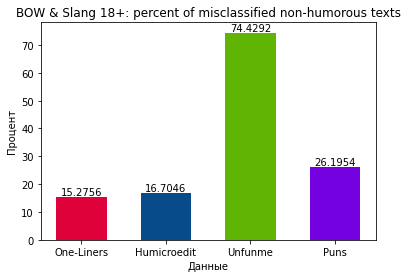

In [ ]:
#BOW & slang 18+
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [15.276, 16.705, 74.429, 26.195]
plt.title('BOW & Slang 18+: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .7, round(perf, 4), color='black', 
            ha='center')

#### Графики BOW + Slang 18 + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __Slang 18+__ с таким же процентом при обычной классификации __BOW__. Это поможет понять, насколько удалось изменить предсказание модели.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Model')

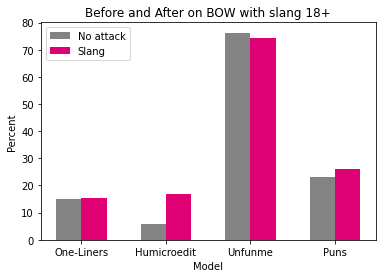

In [19]:
#Slang BOW 18+ 
index = np.arange(4)
bow_before = [15.087,5.859,76.256,23.077]
bow_slang = [15.276,16.705,74.429,26.195]
width = 0.3
plt.title('Before and After on BOW with slang 18+')
#отдельно для до, отдельно для после
plt.bar(index, bow_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, bow_slang, label='Slang', color="#DF0174", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### Word2Vec & LR

#### One-Liners

In [ ]:
oneline_test_adversarial = clean_test_oneline

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous;;;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
oneline_test_adversarial['text'] = oneline_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
oneline_test_adversarial = oneline_test_adversarial.drop(columns=['tokens'])

In [ ]:
oneline_test_adversarial["tokens"] = oneline_test_adversarial["text"].apply(tokenizer.tokenize) #заменяем старые токены на токены с плохими словами

In [ ]:
embeddings_oneline_adv = get_word2vec_embeddings(w2v, oneline_test_adversarial["tokens"]) #получаем эмбеддинги нового датасета

In [ ]:
X_test_oneline_w2v_adv = embeddings_oneline_adv

In [ ]:
y_test_oneline_w2v_adv = oneline_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v) #обучаем на обычных данных
w2v_oneline_adv_predict = classifier.predict(X_test_oneline_w2v_adv) #предсказываем на плохих

In [ ]:
w2v_oneline_adv_predict = pd.Series(w2v_oneline_adv_predict)
w2v_oneline_adv_predict = cleanse_semicolon(w2v_oneline_adv_predict)

In [ ]:
y_test_oneline_w2v_adv = pd.Series(y_test_oneline_w2v_adv)
y_test_oneline_w2v_adv = cleanse_semicolon(y_test_oneline_w2v_adv)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v_adv, w2v_oneline_adv_predict)
print("Adversarial slang W2V 18+\nTrain on: One-liners  Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang W2V 18+
Train on: One-liners  Test on: One-Liners 
accuracy = 0.763, precision = 0.747, recall = 0.789, f1 = 0.763
Precision and recall on humorous class


In [ ]:
oneline_w2v_adversarial_slang = get_metrics_adversarial(y_test_oneline_w2v_adv, w2v_oneline_adv_predict)
print("Adversarial slang word2vec 18+\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneline_w2v_adversarial_slang))

Adversarial slang word2vec 18+
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 26.331%



#### Humicroedit

In [ ]:
humicro_test_adversarial = clean_test_humicro

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
humicro_test_adversarial['text'] = humicro_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
humicro_test_adversarial = humicro_test_adversarial.drop(columns=['tokens'])

In [ ]:
humicro_test_adversarial["tokens"] = humicro_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_humicro_adv = get_word2vec_embeddings(w2v, humicro_test_adversarial["tokens"])

In [ ]:
X_test_humicro_w2v_adv = embeddings_humicro_adv

In [ ]:
y_test_humicro_w2v_adv = humicro_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_adv_predict = classifier.predict(X_test_humicro_w2v_adv)

In [ ]:
w2v_humicro_adv_predict = pd.Series(w2v_humicro_adv_predict)
w2v_humicro_adv_predict = cleanse_semicolon(w2v_humicro_adv_predict)

In [ ]:
y_test_humicro_w2v_adv = pd.Series(y_test_humicro_w2v_adv)
y_test_humicro_w2v_adv = cleanse_semicolon(y_test_humicro_w2v_adv)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v_adv, w2v_humicro_adv_predict)
print("Adversarial slang W2V 18+\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang W2V 18+
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.739, precision = 0.724, recall = 0.772, f1 = 0.739
Precision and recall on humorous class


In [ ]:
humicro_w2v_adversarial_slang = get_metrics_adversarial(y_test_humicro_w2v_adv, w2v_humicro_adv_predict)
print("Adversarial slang word2vec 18+\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_w2v_adversarial_slang))

Adversarial slang word2vec 18+
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 29.389%



#### Unfunme

In [ ]:
unfun_test_adversarial = clean_test_unfun

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous;':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
unfun_test_adversarial['text'] = unfun_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
unfun_test_adversarial = unfun_test_adversarial.drop(columns=['tokens'])

In [ ]:
unfun_test_adversarial["tokens"] = unfun_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_unfun_adv = get_word2vec_embeddings(w2v, unfun_test_adversarial["tokens"])

In [ ]:
X_test_unfun_w2v_adv = embeddings_unfun_adv

In [ ]:
y_test_unfun_w2v_adv = unfun_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_adv_predict = classifier.predict(X_test_unfun_w2v_adv)

In [ ]:
w2v_unfun_adv_predict = pd.Series(w2v_unfun_adv_predict)
w2v_unfun_adv_predict = cleanse_semicolon(w2v_unfun_adv_predict)

In [ ]:
y_test_unfun_w2v_adv = pd.Series(y_test_unfun_w2v_adv)
y_test_unfun_w2v_adv = cleanse_semicolon(y_test_unfun_w2v_adv)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v_adv, w2v_unfun_adv_predict)
print("Adversarial slang W2V 18+\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang W2V 18+
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.664, precision = 0.840, recall = 0.694, f1 = 0.685
Precision and recall on humorous class


In [ ]:
unfun_w2v_adversarial_slang = get_metrics_adversarial(y_test_unfun_w2v_adv, w2v_unfun_adv_predict)
print("Adversarial slang word2vec 18+\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_w2v_adversarial_slang))

Adversarial slang word2vec 18+
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 43.379%



#### Puns

In [ ]:
puns_test_adversarial = clean_test_puns

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
puns_test_adversarial['text'] = puns_test_adversarial.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
puns_test_adversarial = puns_test_adversarial.drop(columns=['tokens'])

In [ ]:
puns_test_adversarial["tokens"] = puns_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_puns_adv = get_word2vec_embeddings(w2v, puns_test_adversarial["tokens"])

In [ ]:
X_test_puns_w2v_adv = embeddings_puns_adv

In [ ]:
y_test_puns_w2v_adv = puns_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_adv_predict = classifier.predict(X_test_puns_w2v_adv)

In [ ]:
w2v_puns_adv_predict = pd.Series(w2v_puns_adv_predict)
w2v_puns_adv_predict = cleanse_semicolon(w2v_puns_adv_predict)

In [ ]:
y_test_puns_w2v_adv = pd.Series(y_test_puns_w2v_adv)
y_test_puns_w2v_adv = cleanse_semicolon(y_test_puns_w2v_adv)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v_adv, w2v_puns_adv_predict)
print("Adversarial slang W2V 18+\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial slang W2V 18+
Train on: Puns  Test on: Puns 
accuracy = 0.847, precision = 0.842, recall = 0.856, f1 = 0.847
Precision and recall on humorous class


In [ ]:
puns_w2v_adversarial_slang = get_metrics_adversarial(y_test_puns_w2v_adv, w2v_puns_adv_predict)
print("Adversarial slang word2vec 18+\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_w2v_adversarial_slang))

Adversarial slang word2vec 18+
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 16.216%



#### Процентные графики

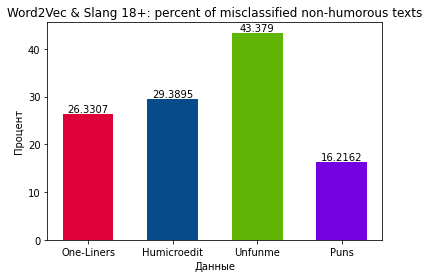

In [ ]:
#word2vec & slang 18+
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [26.331, 29.389, 43.379, 16.216]
plt.title('Word2Vec & Slang 18+: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .4, round(perf, 4), color='black', 
            ha='center')

#### Графики Word2Vec + Slang 18 + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __Slang 18+__ с таким же процентом при обычной классификации __W2V__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

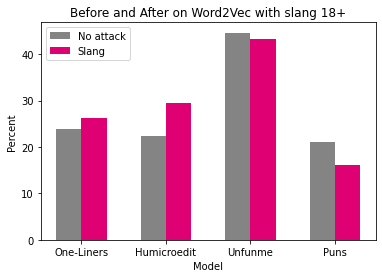

In [20]:
#Slang W2V 18+ 
index = np.arange(4)
w2v_before = [23.776,22.330,44.633,21.053]
w2v_slang = [26.331,29.389,43.379,16.216]
width = 0.3
plt.title('Before and After on Word2Vec with slang 18+')
#отдельно для до, отдельно для после
plt.bar(index, w2v_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, w2v_slang, label='Slang', color="#DF0174", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### Universal Sentence Encoder

#### One-Liners

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
test_oneliners_dl_adv = test_oneliners_dl.toPandas() #преобразуем Spark Dataframe в pd.Dataframe

In [ ]:
test_oneliners_dl_adv['text'] = test_oneliners_dl_adv.apply(lambda row: add_bad_words(row), axis=1) #применяем атаку

In [ ]:
test_oneliners_dl_adv.to_csv("oneliners_adversarial.csv", index=False) #сохраняем как новый файл

In [ ]:
test_oneliners_dl_adv = spark.read \ #читаем заново
      .option("header", True) \
      .csv("oneliners_adversarial.csv")

In [ ]:
test_oneliners_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous| 3179|
|    humorous| 3185|
+------------+-----+



In [ ]:
oneline_dl_prediction_adv = oneline_model.transform(test_oneliners_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_dl_prediction_adv['result'] = oneline_dl_prediction_adv['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_dl_prediction_adv['label'], oneline_dl_prediction_adv['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: Humicroedit 
accuracy = 0.850, precision = 0.830, recall = 0.881, f1 = 0.850
Precision and recall on humorous class


In [ ]:
oneliners_dl_adversarial_slang = get_metrics_adversarial(oneline_dl_prediction_adv['label'], oneline_dl_prediction_adv['result'])
print("Adversarial slang USE & ClassifierDL 18+\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_dl_adversarial_slang))

Adversarial slang USE & ClassifierDL 18+
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 18.087%



#### Humicroedit

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
test_humicro_dl_adv = test_humicro_dl.toPandas()

In [ ]:
test_humicro_dl_adv['text'] = test_humicro_dl_adv.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
test_humicro_dl_adv.to_csv("humicro_adversarial.csv", index=False)

In [ ]:
test_humicro_dl_adv = spark.read \
      .option("header", True) \
      .csv("humicro_adversarial.csv")

In [ ]:
test_humicro_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|    humorous| 5366|
|non-humorous| 5366|
+------------+-----+



In [ ]:
humicro_dl_prediction_adv = humicro_model.transform(test_humicro_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_dl_prediction_adv['result'] = humicro_dl_prediction_adv['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_dl_prediction_adv['label'], humicro_dl_prediction_adv['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.882, precision = 0.866, recall = 0.904, f1 = 0.882
Precision and recall on humorous class


In [ ]:
humicro_dl_adversarial_slang = get_metrics_adversarial(humicro_dl_prediction_adv['label'], humicro_dl_prediction_adv['result'])
print("Adversarial slang USE & ClassifierDL 18+\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_dl_adversarial_slang))

Adversarial slang USE & ClassifierDL 18+
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 13.977%



#### Unfunme

In [ ]:
def add_bad_words(row):
  if row['label'] == 'non-humorous':
    return row['text'] + random.choice(bad_words)
  return row['text']

In [ ]:
test_unfun_dl_adv = test_unfun_dl.toPandas()

In [ ]:
test_unfun_dl_adv['text'] = test_unfun_dl_adv.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
test_unfun_dl_adv.to_csv("unfun_adversarial.csv", index=False)

In [ ]:
test_unfun_dl_adv = spark.read \
      .option("header", True) \
      .csv("unfun_adversarial.csv")

In [ ]:
test_unfun_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  220|
|    humorous|  719|
+------------+-----+



In [ ]:
unfun_dl_prediction_adv = unfun_model.transform(test_unfun_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_dl_prediction_adv['result'] = unfun_dl_prediction_adv['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_dl_prediction_adv['label'], unfun_dl_prediction_adv['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.766, precision = 0.766, recall = 1.000, f1 = 0.664
Precision and recall on humorous class


In [ ]:
unfun_dl_adversarial_slang = get_metrics_adversarial(unfun_dl_prediction_adv['label'], unfun_dl_prediction_adv['result'])
print("Adversarial slang USE & ClassifierDL 18+\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_dl_adversarial_slang))

Adversarial slang USE & ClassifierDL 18+
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 100.000%



#### Puns

In [ ]:
test_puns_dl_adv = test_puns_dl.toPandas()

In [ ]:
test_puns_dl_adv['text'] = test_puns_dl_adv.apply(lambda row: add_bad_words(row), axis=1)

In [ ]:
test_puns_dl_adv.to_csv("puns_adversarial.csv", index=False)

In [ ]:
test_puns_dl_adv = spark.read \
      .option("header", True) \
      .csv("puns_adversarial.csv")

In [ ]:
test_puns_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  481|
|    humorous|  485|
+------------+-----+



In [ ]:
puns_dl_prediction_adv = puns_model.transform(test_puns_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
puns_dl_prediction_adv['result'] = puns_dl_prediction_adv['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_dl_prediction_adv['label'], puns_dl_prediction_adv['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: Puns  Test on: Puns 
accuracy = 0.797, precision = 0.773, recall = 0.843, f1 = 0.797
Precision and recall on humorous class


In [ ]:
puns_dl_adversarial_slang = get_metrics_adversarial(puns_dl_prediction_adv['label'], puns_dl_prediction_adv['result'])
print("Adversarial slang USE & ClassifierDL 18+\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_dl_adversarial_slang))

Adversarial slang USE & ClassifierDL 18+
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 24.948%



#### Процентные графики

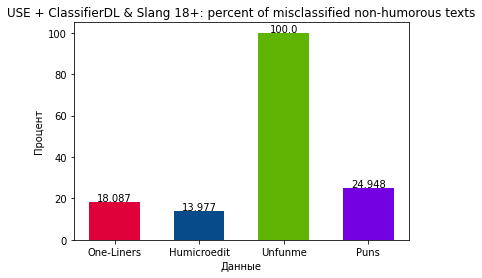

In [7]:
#Universal Sentence Encoder & slang 18+
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [18.087,13.977,100.000,24.948]
plt.title('USE + ClassifierDL & Slang 18+: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .4, round(perf, 4), color='black', 
            ha='center')

Text(0.5, 0, 'Dataset')

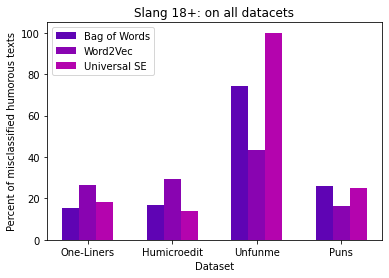

In [8]:
#Universal Sentence Encoder & slang 18+
index = np.arange(4)
width = 0.2
values_bow = [15.276, 16.705, 74.429, 26.195]
values_w2v = [26.331, 29.389, 43.379, 16.216]
values_dl = [18.087,13.977,100.000,24.948]
plt.title('Slang 18+: on all datacets')
plt.bar(index, values_bow, label = 'Bag of Words', color='#5F04B4', width=0.2)
plt.bar(index + width, values_w2v, label = 'Word2Vec', color='#8904B1', width=0.2)
plt.bar(index + 2 * width, values_dl, label = 'Universal SE', color='#B404AE', width=0.2)
plt.legend(loc='upper left')
plt.xticks(index + width, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Percent of misclassified humorous texts')
plt.xlabel("Dataset")

#### Графики USE + Slang 18 + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __Slang 18+__ с таким же процентом при обычной классификации __USE__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

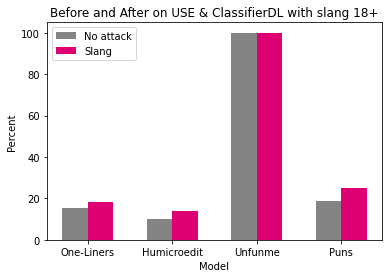

In [21]:
#Slang USE & Classifier 18+ 
index = np.arange(4)
use_before = [15.445,10.194,100.000,18.919]
use_slang = [18.087,13.977,100.000,24.948]
width = 0.3
plt.title('Before and After on USE & ClassifierDL with slang 18+')
#отдельно для до, отдельно для после
plt.bar(index, use_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, use_slang, label='Slang', color="#DF0174", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

## Антонимы

Вторая атака - замена последнего слова из текста на __антоним__. Эта атака использует предположение о том, что панчлайн, который, как правило, находится в конце шутки, строится на том, чтобы противопоставить ожидания читателя/слушателя. 

Антонимы слов извлекаются с помощью __WordNet__. Если антоним последнего слова не найден, происходит замена предпоследнего слова, и так далее, пока строка не закончится.


In [ ]:
nltk.download('wordnet') #скачиваем 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn #импортируем

### Какой процент текстов успешно заменяется?

Может быть так, что для всего текста нет антонимов. Какая доля текстов была изменена? 

In [ ]:
from collections import Counter #счетчик

In [ ]:
oneline_ant_count = list((Counter(oneline_test_adversarial_antonyms['text']) - Counter(clean_test_oneline['text'])).elements())

In [ ]:
humicro_ant_count = list((Counter(humicro_test_adversarial_antonyms['text']) - Counter(clean_test_humicro['text'])).elements())

In [ ]:
unfun_ant_count = list((Counter(unfun_test_adversarial_antonyms['text']) - Counter(clean_test_unfun['text'])).elements())

In [ ]:
puns_ant_count = list((Counter(puns_test_adversarial_antonyms['text']) - Counter(clean_test_puns['text'])).elements())

In [ ]:
print("Adversarial Antonyms: percent of changes in One-liners test set: %.3f%%" % (len(oneline_ant_count) * 100/len(oneline_test_adversarial_antonyms['text'])))

Adversarial Antonyms: percent of changes in One-liners test set: 18.228%


In [ ]:
print("Adversarial Antonyms: percent of changes in Humicroedit test set: %.3f%%" % (len(humicro_ant_count) * 100/len(humicro_test_adversarial_antonyms['text'])))

Adversarial Antonyms: percent of changes in Humicroedit test set: 13.491%


In [ ]:
print("Adversarial Antonyms: percent of changes in Unfunme test set: %.3f%%" % (len(unfun_ant_count) * 100/len(unfun_test_adversarial_antonyms['text'])))

Adversarial Antonyms: percent of changes in Unfunme test set: 5.989%


In [ ]:
print("Adversarial Antonyms: percent of changes in Puns test set: %.3f%%" % (len(puns_ant_count) * 100/len(puns_test_adversarial_antonyms['text'])))

Adversarial Antonyms: percent of changes in Puns test set: 19.048%


### BOW & LR

#### One-liners

In [ ]:
oneline_test_adversarial_antonyms = clean_test_oneline

In [ ]:
def replace_for_antonym_ol(row): #функция для замены на антоним
  wn_lemmas = set(wn.all_lemma_names())
  if row['label'] == 'non-humorous;;;':
    text = row['text']
    if (len(text) != 0):
      word = ''
      for w in reversed(text.split()):
        if w in wn_lemmas:
          word = w
          break
      if word == '':
        return row['text']
      syns = wn.synsets(word)
      for syn in syns:
        for lemma in syn.lemmas():
          if lemma.antonyms():
            new_word = lemma.antonyms()[0].name()
            print(word, new_word)
            return text[:-1] + new_word
  return row['text']

In [ ]:
oneline_test_adversarial_antonyms = oneline_test_adversarial_antonyms.dropna()

In [ ]:
#применяем функцию
oneline_test_adversarial_antonyms['text'] = oneline_test_adversarial_antonyms.apply(lambda row: replace_for_antonym_ol(row), axis=1)

go stay_in_place
license decertify
net gross
short long
falls ascent
armed disarm
fall ascent
strike miss
doubt certainty
rise fall
all no
down up
call put_option
force pull
value disrespect
old young
on off
will disinherit
fault merit
unchanged changed
morning sunset
have lack
competition cooperation
son daughter
talks keep_quiet
well ill
rise fall
up down
worse better
on off
profit break_even
work idle
multiple single
cut switch_on
away home
taken give
ahead back
spent unexhausted
assets liability
man woman
out safe
cut switch_on
hell Heaven
woman man
significant insignificant
contented discontent
classic nonclassical
sack hire
well ill
fall ascent
work idle
lose keep
be differ
fall ascent
unchanged changed
home away
day night
diminished increase
choking unclog
men woman
on off
bank withdraw
fault merit
feed starve
man woman
alert unalert
face avoid
go stay_in_place
dead living
changing stay
held let_go_of
public private
profit break_even
still agitate
vanity humility
head rear
joint

In [ ]:
X_test_oneline_adv_ant = oneline_test_adversarial_antonyms['text']
y_test_oneline_adv_ant = oneline_test_adversarial_antonyms['label']

In [ ]:
bow_oneline_adv_ant = dict()
bow_oneline_adv_ant["test"]  = (count_vectorizer.transform(X_test_oneline_adv_ant), y_test_oneline_adv_ant)

In [ ]:
embedding_bow_oneline_adv_ant = bow_oneline_adv_ant
bow_oneline_adv_ant_predict = classifier.predict(embedding_bow_oneline_adv_ant["test"][0])

In [ ]:
bow_oneline_adv_ant_predict = pd.Series(bow_oneline_adv_ant_predict)
bow_oneline_adv_ant_predict = cleanse_semicolon(bow_oneline_adv_ant_predict)

In [ ]:
embedding_bow_oneline_adv_ant_test = pd.Series(embedding_bow_oneline_adv_ant["test"][1])
embedding_bow_oneline_adv_ant_test = cleanse_semicolon(embedding_bow_oneline_adv_ant_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_adv_ant_test, bow_oneline_adv_ant_predict)
print("Adversarial antonyms BOW\nTrain on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms BOW
Train on: One-liners  Test on: One-liners 
accuracy = 0.818, precision = 0.846, recall = 0.774, f1 = 0.818
Precision and recall on humorous class


In [ ]:
oneliners_bow_adversarial_antonyms = get_metrics_adversarial(embedding_bow_oneline_adv_ant_test, bow_oneline_adv_ant_predict)
print("Adversarial antonyms BOW \nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_bow_adversarial_antonyms))

Adversarial antonyms BOW 
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 13.858%



#### Humicroedit

In [ ]:
humicro_test_adversarial_antonyms = clean_test_humicro

In [ ]:
def replace_for_antonym_hum(row):
  wn_lemmas = set(wn.all_lemma_names())
  if row['label'] == 'non-humorous;':
    text = row['text']
    if (len(text) != 0):
      word = ''
      for w in reversed(text.split()):
        if w in wn_lemmas:
          word = w
          break
      if word == '':
        return row['text']
      syns = wn.synsets(word)
      for syn in syns:
        for lemma in syn.lemmas():
          if lemma.antonyms():
            new_word = lemma.antonyms()[0].name()
            print(word, new_word)
            return text[:-1] + new_word
  return row['text']

In [ ]:
humicro_test_adversarial_antonyms = humicro_test_adversarial_antonyms.drop(columns=['tokens'])

In [ ]:
humicro_test_adversarial_antonyms = humicro_test_adversarial_antonyms.dropna()

In [ ]:
humicro_test_adversarial_antonyms['text'] = humicro_test_adversarial_antonyms.apply(lambda row: replace_for_antonym_hum(row), axis=1)

meet diverge
political nonpolitical
pay default
breach keep
block unstuff
nastiness niceness
enter exit
big small
defeat victory
war peace
complaining cheer
nastiness niceness
social unsocial
down up
ignore notice
live recorded
federal unitary
white black
call put_option
enter exit
little large
trust distrust
fixing break
white black
warm cool
sexual asexual
opening closing
toxic nontoxic
unintended intended
barred unbar
near far
entering exit
sinking float
lead deficit
on off
wrong right
pro amateur
political nonpolitical
admit deny
on off
go stay_in_place
there here
suspected trust
radical cauline
no yes
on off
being nonbeing
do unmake
coastal inland
pretty unreasonably
on off
meet diverge
on off
ever never
financial nonfinancial
do unmake
ordering deregulate
new old
ever never
happening dematerialize
more less
back front
sure uncertain
claim disclaim
get leave
down up
future past
presidential unpresidential
on off
political nonpolitical
damn bless
morning sunset
firing hire
union se

In [ ]:
X_test_humicro_adv_ant = humicro_test_adversarial_antonyms['text']
y_test_humicro_adv_ant = humicro_test_adversarial_antonyms['label']

In [ ]:
bow_humicro_adv_ant = dict()
bow_humicro_adv_ant["test"]  = (count_vectorizer.transform(X_test_humicro_adv_ant), y_test_humicro_adv_ant)

In [ ]:
embedding_bow_humicro_adv_ant = bow_humicro_adv_ant
bow_humicro_adv_ant_predict = classifier.predict(embedding_bow_humicro_adv_ant["test"][0])

In [ ]:
bow_humicro_adv_ant_predict = pd.Series(bow_humicro_adv_ant_predict)
bow_humicro_adv_ant_predict = cleanse_semicolon(bow_humicro_adv_ant_predict)

In [ ]:
embedding_bow_humicro_adv_ant_test = pd.Series(embedding_bow_humicro_adv_ant["test"][1])
embedding_bow_humicro_adv_ant_test = cleanse_semicolon(embedding_bow_humicro_adv_ant_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_adv_ant_test, bow_humicro_adv_ant_predict)
print("Adversarial antonyms BOW\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms BOW
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.937, precision = 0.925, recall = 0.951, f1 = 0.937
Precision and recall on humorous class


In [ ]:
humicro_bow_adversarial_antonyms = get_metrics_adversarial(embedding_bow_humicro_adv_ant_test, bow_humicro_adv_ant_predict)
print("Adversarial antonyms BOW \nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_bow_adversarial_antonyms))

Adversarial antonyms BOW 
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 7.698%



#### Unfunme

In [ ]:
unfun_test_adversarial_antonyms = clean_test_unfun

In [ ]:
def replace_for_antonym_unf(row):
  wn_lemmas = set(wn.all_lemma_names())
  if row['label'] == 'non-humorous;':
    text = row['text']
    if (len(text) != 0):
      word = ''
      for w in reversed(text.split()):
        if w in wn_lemmas:
          word = w
          break
      if word == '':
        return row['text']
      syns = wn.synsets(word)
      for syn in syns:
        for lemma in syn.lemmas():
          if lemma.antonyms():
            new_word = lemma.antonyms()[0].name()
            print(word, new_word)
            return text[:-1] + new_word
  return row['text']

In [ ]:
unfun_test_adversarial_antonyms = unfun_test_adversarial_antonyms.drop(columns=['tokens'])

In [ ]:
unfun_test_adversarial_antonyms = unfun_test_adversarial_antonyms.dropna()

In [ ]:
unfun_test_adversarial_antonyms['text'] = unfun_test_adversarial_antonyms.apply(lambda row: replace_for_antonym_unf(row), axis=1)

man woman
no yes
troubled untroubled
malnourished nourished
child parent
welfare ill-being
heat coldness
political nonpolitical
new old
rewarding dishonor
demand supply
mind forget
death birth
united divide
safety danger
contract stretch
bombing pass
interstate intrastate
cash credit
out safe
wife husband
many few
increase decrease
offense defense
loud soft
break repair
contract stretch
general particular
soil clean
unemployment employment
demand supply
net gross
show disprove
young aged
lower raise
up down
tasty tasteless
peace war
run malfunction
cheap expensive
handed handless
day night
out safe
precision impreciseness
love hate
new old
country urban_area
effective ineffective
driver nondriver
die be_born
days night
free confine
day night
up down
up down
husband wife


In [ ]:
X_test_unfun_adv_ant = unfun_test_adversarial_antonyms['text']
y_test_unfun_adv_ant = unfun_test_adversarial_antonyms['label']

In [ ]:
bow_unfun_adv_ant = dict()
bow_unfun_adv_ant["test"]  = (count_vectorizer.transform(X_test_unfun_adv_ant), y_test_unfun_adv_ant)

In [ ]:
embedding_bow_unfun_adv_ant = bow_unfun_adv_ant
bow_unfun_adv_ant_predict = classifier.predict(embedding_bow_unfun_adv_ant["test"][0])

In [ ]:
bow_unfun_adv_ant_predict = pd.Series(bow_unfun_adv_ant_predict)
bow_unfun_adv_ant_predict = cleanse_semicolon(bow_unfun_adv_ant_predict)

In [ ]:
embedding_bow_unfun_adv_ant_test = pd.Series(embedding_bow_unfun_adv_ant["test"][1])
embedding_bow_unfun_adv_ant_test = cleanse_semicolon(embedding_bow_unfun_adv_ant_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_adv_ant_test, bow_unfun_adv_ant_predict)
print("Adversarial antonyms BOW\nTrain on: Unfunme Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms BOW
Train on: Unfunme Test on: Unfunme 
accuracy = 0.722, precision = 0.789, recall = 0.869, f1 = 0.701
Precision and recall on humorous class


In [ ]:
unfun_bow_adversarial_antonyms = get_metrics_adversarial(embedding_bow_unfun_adv_ant_test, bow_unfun_adv_ant_predict)
print("Adversarial antonyms BOW \nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_bow_adversarial_antonyms))

Adversarial antonyms BOW 
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 75.799%



#### Puns

In [ ]:
puns_test_adversarial_antonyms = clean_test_puns

In [ ]:
def replace_for_antonym_puns(row):
  wn_lemmas = set(wn.all_lemma_names())
  if row['label'] == 'non-humorous':
    text = row['text']
    if (len(text) != 0):
      word = ''
      for w in reversed(text.split()):
        if w in wn_lemmas:
          word = w
          break
      if word == '':
        return row['text']
      syns = wn.synsets(word)
      for syn in syns:
        for lemma in syn.lemmas():
          if lemma.antonyms():
            new_word = lemma.antonyms()[0].name()
            print(word, new_word)
            return text[:-1] + new_word
  return row['text']

In [ ]:
puns_test_adversarial_antonyms = puns_test_adversarial_antonyms.dropna()

In [ ]:
puns_test_adversarial_antonyms['text'] = puns_test_adversarial_antonyms.apply(lambda row: replace_for_antonym_puns(row), axis=1)

do unmake
bear bull
here there
make unmake
morning sunset
here there
worse better
part wholly
think forget
birth death
decision indecisiveness
well ill
change stay
all no
different same
out safe
known ignore
best worst
leave arrive
saved lost
start end
bed get_up
free confine
youth aged
forget remember
joy sorrow
think forget
right left
temporary permanent
play tightness
right left
agreed disagree
tongue artificial_language
friend foe
fall ascent
soaked undercharge
man woman
days night
ride walk
do unmake
looking back
take give
present future
other same
good evil
best worst
course unnaturally
being nonbeing
do unmake
patient impatient
raise descent
love hate
stuff unstuff
other same
all no
last first
up down
worker nonworker
power powerlessness
change stay
known ignore
stay change
new old
later early
more less
looking back
home away
up down
living dead
weak strong
out safe
on off
changed stay
close open
broken repair
out safe
kid parent
have lack
like dislike
are differ
away home
prope

In [ ]:
X_test_puns_adv_ant = puns_test_adversarial_antonyms['text']
y_test_puns_adv_ant = puns_test_adversarial_antonyms['label']

In [ ]:
bow_puns_adv_ant = dict()
bow_puns_adv_ant["test"]  = (count_vectorizer.transform(X_test_puns_adv_ant), y_test_puns_adv_ant)

In [ ]:
embedding_bow_puns_adv_ant = bow_puns_adv_ant
bow_puns_adv_ant_predict = classifier.predict(embedding_bow_puns_adv_ant["test"][0])

In [ ]:
bow_puns_adv_ant_predict = pd.Series(bow_puns_adv_ant_predict)
bow_puns_adv_ant_predict = cleanse_semicolon(bow_puns_adv_ant_predict)

In [ ]:
embedding_bow_puns_adv_ant = pd.Series(embedding_bow_puns_adv_ant["test"][1])
embedding_bow_puns_adv_ant = cleanse_semicolon(embedding_bow_puns_adv_ant)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_adv_ant, bow_puns_adv_ant_predict)
print("Adversarial antonyms BOW\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms BOW
Train on: Puns  Test on: Puns 
accuracy = 0.735, precision = 0.746, recall = 0.715, f1 = 0.735
Precision and recall on humorous class


In [ ]:
puns_bow_adversarial_antonyms = get_metrics_adversarial(embedding_bow_puns_adv_ant, bow_puns_adv_ant_predict)
print("Adversarial antonyms BOW \nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_bow_adversarial_antonyms))

Adversarial antonyms BOW 
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 24.532%



#### Процентные графики

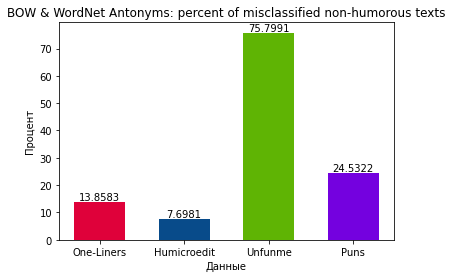

In [ ]:
#BOW & Antonyms
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [13.858,7.698,75.799,24.532]
plt.title('BOW & WordNet Antonyms: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .7, round(perf, 4), color='black', 
            ha='center')

#### Графики BOW + Антонимы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __антонимов__ с таким же процентом при обычной классификации __BOW__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

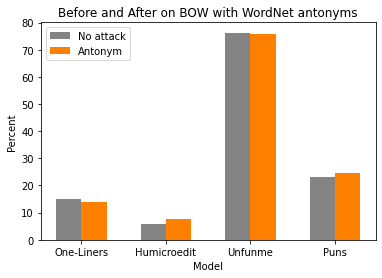

In [22]:
#BOW антонимы 
index = np.arange(4)
bow_before = [15.087,5.859,76.256,23.077]
bow_ant = [13.858,7.698,75.799,24.532]
width = 0.3
plt.title('Before and After on BOW with WordNet antonyms')
#отдельно для до, отдельно для после
plt.bar(index, bow_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, bow_ant, label='Antonym', color="#FF8000", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### Word2Vec & LR

#### One-Liners

In [ ]:
oneline_test_adversarial = clean_test_oneline

In [ ]:
oneline_test_adversarial['text'] = oneline_test_adversarial.apply(lambda row: replace_for_antonym_ol(row), axis=1)

In [ ]:
oneline_test_adversarial = oneline_test_adversarial.drop(columns=['tokens'])

In [ ]:
oneline_test_adversarial["tokens"] = oneline_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_oneline_adv_ant = get_word2vec_embeddings(w2v, oneline_test_adversarial["tokens"])

In [ ]:
X_test_oneline_w2v_adv_ant = embeddings_oneline_adv_ant

In [ ]:
y_test_oneline_w2v_adv_ant = oneline_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v)
w2v_oneline_adv_predict_ant = classifier.predict(X_test_oneline_w2v_adv_ant)

In [ ]:
w2v_oneline_adv_predict_ant = pd.Series(w2v_oneline_adv_predict_ant)
w2v_oneline_adv_predict_ant = cleanse_semicolon(w2v_oneline_adv_predict_ant)

In [ ]:
y_test_oneline_w2v_adv_ant = pd.Series(y_test_oneline_w2v_adv_ant)
y_test_oneline_w2v_adv_ant = cleanse_semicolon(y_test_oneline_w2v_adv_ant)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v_adv_ant, w2v_oneline_adv_predict_ant)
print("Adversarial antonyms W2V\nTrain on: One-liners  Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms W2V
Train on: One-liners  Test on: One-Liners 
accuracy = 0.781, precision = 0.774, recall = 0.789, f1 = 0.781
Precision and recall on humorous class


In [ ]:
oneline_w2v_adversarial_antonym = get_metrics_adversarial(y_test_oneline_w2v_adv_ant, w2v_oneline_adv_predict_ant)
print("Adversarial antonyms word2vec\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneline_w2v_adversarial_antonym))

Adversarial antonyms word2vec
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 22.677%



#### Humicroedit

In [ ]:
humicro_test_adversarial = clean_test_humicro

In [ ]:
humicro_test_adversarial['text'] = humicro_test_adversarial.apply(lambda row: replace_for_antonym_hum(row), axis=1)

In [ ]:
humicro_test_adversarial = humicro_test_adversarial.drop(columns=['tokens'])

In [ ]:
humicro_test_adversarial["tokens"] = humicro_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_humicro_adv_ant = get_word2vec_embeddings(w2v, humicro_test_adversarial["tokens"])

In [ ]:
X_test_humicro_w2v_adv_ant = embeddings_humicro_adv_ant

In [ ]:
y_test_humicro_w2v_adv_ant = humicro_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_adv_predict_ant = classifier.predict(X_test_humicro_w2v_adv_ant)

In [ ]:
w2v_humicro_adv_predict_ant = pd.Series(w2v_humicro_adv_predict_ant)
w2v_humicro_adv_predict_ant = cleanse_semicolon(w2v_humicro_adv_predict_ant)

In [ ]:
y_test_humicro_w2v_adv_ant = pd.Series(y_test_humicro_w2v_adv_ant)
y_test_humicro_w2v_adv_ant = cleanse_semicolon(y_test_humicro_w2v_adv_ant)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v_adv_ant, w2v_humicro_adv_predict_ant)
print("Adversarial antonyms W2V\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms W2V
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.784, precision = 0.791, recall = 0.772, f1 = 0.784
Precision and recall on humorous class


In [ ]:
humicro_w2v_adversarial_antonym = get_metrics_adversarial(y_test_humicro_w2v_adv_ant, w2v_humicro_adv_predict_ant)
print("Adversarial antonyms word2vec\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_w2v_adversarial_antonym))

Adversarial antonyms word2vec
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 20.364%



#### Unfunme

In [ ]:
unfun_test_adversarial = clean_test_unfun

In [ ]:
unfun_test_adversarial['text'] = unfun_test_adversarial.apply(lambda row: replace_for_antonym_unf(row), axis=1)

In [ ]:
unfun_test_adversarial = unfun_test_adversarial.drop(columns=['tokens'])

In [ ]:
unfun_test_adversarial["tokens"] = unfun_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_unfun_adv_ant = get_word2vec_embeddings(w2v, unfun_test_adversarial["tokens"])

In [ ]:
X_test_unfun_w2v_adv_ant = embeddings_unfun_adv_ant

In [ ]:
y_test_unfun_w2v_adv_ant = unfun_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_adv_predict_ant = classifier.predict(X_test_unfun_w2v_adv_ant)

In [ ]:
w2v_unfun_adv_predict_ant = pd.Series(w2v_unfun_adv_predict_ant)
w2v_unfun_adv_predict_ant = cleanse_semicolon(w2v_unfun_adv_predict_ant)

In [ ]:
y_test_unfun_w2v_adv_ant = pd.Series(y_test_unfun_w2v_adv_ant)
y_test_unfun_w2v_adv_ant = cleanse_semicolon(y_test_unfun_w2v_adv_ant)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v_adv_ant, w2v_unfun_adv_predict_ant)
print("Adversarial antonyms W2V\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonyms W2V
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.689, precision = 0.873, recall = 0.694, f1 = 0.710
Precision and recall on humorous class


In [ ]:
unfun_w2v_adversarial_antonyms = get_metrics_adversarial(y_test_unfun_w2v_adv_ant, w2v_unfun_adv_predict_ant)
print("Adversarial antonyms word2vec\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_w2v_adversarial_antonyms))

Adversarial antonyms word2vec
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 32.877%



#### Puns

In [ ]:
puns_test_adversarial = clean_test_puns

In [ ]:
puns_test_adversarial['text'] = puns_test_adversarial.apply(lambda row: replace_for_antonym_puns(row), axis=1)

In [ ]:
puns_test_adversarial = puns_test_adversarial.drop(columns=['tokens'])

In [ ]:
puns_test_adversarial["tokens"] = puns_test_adversarial["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_puns_adv_ant = get_word2vec_embeddings(w2v, puns_test_adversarial["tokens"])

In [ ]:
X_test_puns_w2v_adv_ant = embeddings_puns_adv_ant

In [ ]:
y_test_puns_w2v_adv_ant = puns_test_adversarial["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_adv_predict_ant = classifier.predict(X_test_puns_w2v_adv_ant)

In [ ]:
w2v_puns_adv_predict_ant = pd.Series(w2v_puns_adv_predict_ant)
w2v_puns_adv_predict_ant = cleanse_semicolon(w2v_puns_adv_predict_ant)

In [ ]:
y_test_puns_w2v_adv_ant = pd.Series(y_test_puns_w2v_adv_ant)
y_test_puns_w2v_adv_ant = cleanse_semicolon(y_test_puns_w2v_adv_ant)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v_adv_ant, w2v_puns_adv_predict_ant)
print("Adversarial antonym W2V\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonym W2V
Train on: Puns  Test on: Puns 
accuracy = 0.855, precision = 0.856, recall = 0.856, f1 = 0.855
Precision and recall on humorous class


In [ ]:
puns_w2v_adversarial_antonym = get_metrics_adversarial(y_test_puns_w2v_adv_ant, w2v_puns_adv_predict_ant)
print("Adversarial antonym word2vec\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_w2v_adversarial_antonym))

Adversarial antonym word2vec
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 14.553%



#### Процентные графики

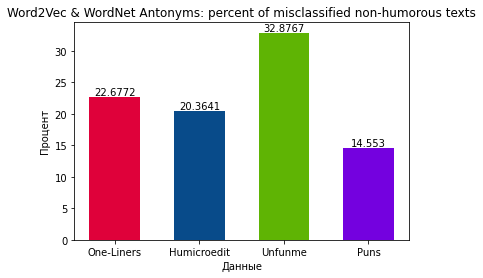

In [ ]:
#word2vec & antonym
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [22.677,20.364,32.877,14.553]
plt.title('Word2Vec & WordNet Antonyms: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .3, round(perf, 4), color='black', 
            ha='center')

#### Графики Word2Vec + Антонимы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __антонимов__ с таким же процентом при обычной классификации __W2V__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

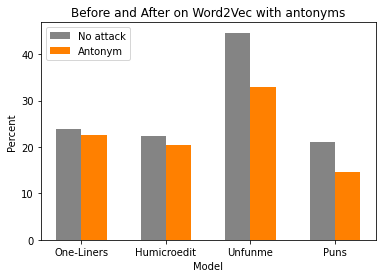

In [23]:
#W2V + antonyms 
index = np.arange(4)
w2v_before = [23.776,22.330,44.633,21.053]
w2v_ant = [22.677,20.364,32.877,14.553]
width = 0.3
plt.title('Before and After on Word2Vec with antonyms')
#отдельно для до, отдельно для после
plt.bar(index, w2v_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, w2v_ant, label='Antonym', color="#FF8000", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### Universal Sentence Encoder & ClassifierDL

#### One-Liners

In [ ]:
def replace_for_antonym_dl(row): #одна функция для всех из этого раздела
  wn_lemmas = set(wn.all_lemma_names())
  if row['label'] == 'non-humorous':
    text = row['text']
    if (len(text) != 0):
      word = ''
      for w in reversed(text.split()):
        if w in wn_lemmas:
          word = w
          break
      if word == '':
        return row['text']
      syns = wn.synsets(word)
      for syn in syns:
        for lemma in syn.lemmas():
          if lemma.antonyms():
            new_word = lemma.antonyms()[0].name()
            print(word, new_word)
            return text[:-1] + new_word
  return row['text']

In [ ]:
test_oneliners_dl_adv = test_oneliners_dl.toPandas()

In [ ]:
test_oneliners_dl_adv['text'] = test_oneliners_dl_adv.apply(lambda row: replace_for_antonym_dl(row), axis=1)

In [ ]:
test_oneliners_dl_adv.to_csv("oneliners_adversarial.csv", index=False)

In [ ]:
test_oneliners_dl_adv = spark.read \
      .option("header", True) \
      .csv("oneliners_adversarial.csv")

In [ ]:
test_oneliners_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous| 3179|
|    humorous| 3185|
+------------+-----+



In [ ]:
oneline_dl_prediction_adv_ant = oneline_model.transform(test_oneliners_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_dl_prediction_adv_ant['result'] = oneline_dl_prediction_adv_ant['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_dl_prediction_adv_ant['label'], oneline_dl_prediction_adv_ant['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: Humicroedit 
accuracy = 0.862, precision = 0.862, recall = 0.863, f1 = 0.862
Precision and recall on humorous class


In [ ]:
oneliners_dl_adversarial_antonym = get_metrics_adversarial(oneline_dl_prediction_adv_ant['label'], oneline_dl_prediction_adv_ant['result'])
print("Adversarial antonyms USE & ClassifierDL\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_dl_adversarial_antonym))

Adversarial antonyms USE & ClassifierDL
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 13.809%



#### Humicroedit

In [ ]:
test_humicro_dl_adv = test_humicro_dl.toPandas()

In [ ]:
test_humicro_dl_adv['text'] = test_humicro_dl_adv.apply(lambda row: replace_for_antonym_dl(row), axis=1)

In [ ]:
test_humicro_dl_adv.to_csv("humicro_adversarial.csv", index=False)

In [ ]:
test_humicro_dl_adv = spark.read \
      .option("header", True) \
      .csv("humicro_adversarial.csv")

In [ ]:
test_humicro_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|    humorous| 5366|
|non-humorous| 5366|
+------------+-----+



In [ ]:
humicro_dl_prediction_adv_ant = humicro_model.transform(test_humicro_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_dl_prediction_adv_ant['result'] = humicro_dl_prediction_adv_ant['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_dl_prediction_adv_ant['label'], humicro_dl_prediction_adv_ant['result'])
print("Adversarial Antonym\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial Antonym
Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.899, precision = 0.897, recall = 0.901, f1 = 0.899
Precision and recall on humorous class


In [ ]:
humicro_dl_adversarial_antonym = get_metrics_adversarial(humicro_dl_prediction_adv_ant['label'], humicro_dl_prediction_adv_ant['result'])
print("Adversarial antonym USE & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_dl_adversarial_antonym))

Adversarial antonym USE & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 10.324%



#### Unfunme

In [ ]:
test_unfun_dl_adv = test_unfun_dl.toPandas()

In [ ]:
test_unfun_dl_adv['text'] = test_unfun_dl_adv.apply(lambda row: replace_for_antonym_dl(row), axis=1)

no yes
rewarding dishonor
do unmake
death birth
invasive noninvasive
contract stretch
interstate intrastate
just unjust
loud soft
soil clean
net gross
lower raise
tasty tasteless
country urban_area
successful unsuccessful
running malfunction
up down
husband wife


In [ ]:
test_unfun_dl_adv.to_csv("unfun_adversarial.csv", index=False)

In [ ]:
test_unfun_dl_adv = spark.read \
      .option("header", True) \
      .csv("unfun_adversarial.csv")

In [ ]:
test_unfun_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  220|
|    humorous|  719|
+------------+-----+



In [ ]:
unfun_dl_prediction_adv_ant = unfun_model.transform(test_unfun_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_dl_prediction_adv_ant['result'] = unfun_dl_prediction_adv_ant['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_dl_prediction_adv_ant['label'], unfun_dl_prediction_adv_ant['result'])
print("Adversarial antonym\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonym
Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.766, precision = 0.766, recall = 1.000, f1 = 0.664
Precision and recall on humorous class


In [ ]:
unfun_dl_adversarial_antonym = get_metrics_adversarial(unfun_dl_prediction_adv_ant['label'], unfun_dl_prediction_adv_ant['result'])
print("Adversarial antonym USE & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_dl_adversarial_antonym))

Adversarial antonym USE & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 100.000%



#### Puns

In [ ]:
test_puns_dl_adv = test_puns_dl.toPandas()

In [ ]:
test_puns_dl_adv['text'] = test_puns_dl_adv.apply(lambda row: replace_for_antonym_dl(row), axis=1)

do unmake
bear bull
here there
make unmake
morning sunset
here there
worse better
part wholly
think forget
end beginning
birth death
decision indecisiveness
well ill
change stay
all no
different same
out safe
known ignore
best worst
leave arrive
saved lost
start end
bed get_up
free confine
youth aged
forget remember
joy sorrow
think forget
right left
temporary permanent
play tightness
right left
agreed disagree
tongue artificial_language
friend foe
fall ascent
soaked undercharge
man woman
days night
ride walk
do unmake
looking back
take give
present future
other same
good evil
best worst
course unnaturally
being nonbeing
do unmake
patient impatient
raise descent
love hate
stuff unstuff
other same
all no
last first
up down
worker nonworker
power powerlessness
change stay
known ignore
stay change
new old
later early
more less
looking back
home away
up down
living dead
weak strong
out safe
on off
changed stay
close open
broken repair
out safe
kid parent
have lack
like dislike
are differ
a

In [ ]:
test_puns_dl_adv.to_csv("puns_adversarial.csv", index=False)

In [ ]:
test_puns_dl_adv = spark.read \
      .option("header", True) \
      .csv("puns_adversarial.csv")

In [ ]:
test_puns_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  481|
|    humorous|  485|
+------------+-----+



In [ ]:
puns_dl_prediction_adv_ant = puns_model.transform(test_puns_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
puns_dl_prediction_adv_ant['result'] = puns_dl_prediction_adv_ant['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_dl_prediction_adv_ant['label'], puns_dl_prediction_adv_ant['result'])
print("Adversarial antonym\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial antonym
Universal Sentence Encoder & ClassifierDL
Train on: Puns  Test on: Puns 
accuracy = 0.814, precision = 0.801, recall = 0.837, f1 = 0.814
Precision and recall on humorous class


In [ ]:
puns_dl_adversarial_antonym = get_metrics_adversarial(puns_dl_prediction_adv_ant['label'], puns_dl_prediction_adv_ant['result'])
print("Adversarial antonym USE & ClassifierDL\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_dl_adversarial_antonym))

Adversarial antonym USE & ClassifierDL
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 20.998%



#### Процентные графики

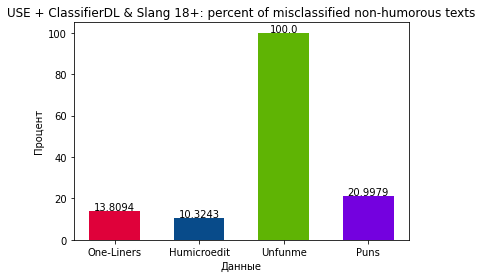

In [ ]:
#Universal Sentence Encoder & slang 18+
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [13.809,10.324,100.000,20.998]
plt.title('USE + ClassifierDL & Slang 18+: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .4, round(perf, 4), color='black', 
            ha='center')

Text(0.5, 0, 'Dataset')

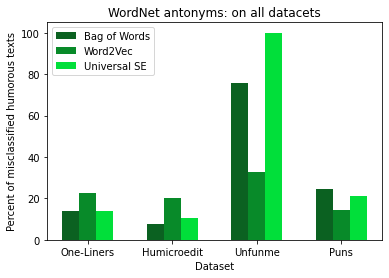

In [12]:
#Universal Sentence Encoder & WordNet antonyms
index = np.arange(4)
width = 0.2
values_bow = [13.858, 7.698, 75.799, 24.532]
values_w2v = [22.677, 20.364, 32.877, 14.553]
values_dl = [13.809,10.324,100.000,20.998]
plt.title('WordNet antonyms: on all datacets')
plt.bar(index, values_bow, label = 'Bag of Words', color='#0B6121', width=0.2)
plt.bar(index + width, values_w2v, label = 'Word2Vec', color='#088A29', width=0.2)
plt.bar(index + 2 * width, values_dl, label = 'Universal SE', color='#01DF3A', width=0.2)
plt.legend(loc='upper left')
plt.xticks(index + width, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Percent of misclassified humorous texts')
plt.xlabel("Dataset")

#### Графики USE + Антонимы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __антонимов__ с таким же процентом при обычной классификации __USE__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

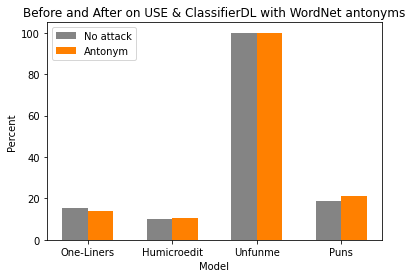

In [24]:
#USE & Antonyms
index = np.arange(4)
use_before = [15.445,10.194,100.000,18.919]
use_ant = [13.809,10.324,100.000,20.998]
width = 0.3
plt.title('Before and After on USE & ClassifierDL with WordNet antonyms')
#отдельно для до, отдельно для после
plt.bar(index, use_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, use_ant, label='Antonym', color="#FF8000", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

## Рифма

Последняя состязательная атака - добавление в конец текста рифмы к последнему слову. Строится на гипотезе о том, что рифмы, повторяющиеся слова создают юмористический эффект.

Рифмы добавляются с помощью API **Datamuse**. Если рифмы нет, то текст пропускается.

In [ ]:
!pip3 install python-datamuse #установка необходимого

In [ ]:
from datamuse import datamuse
api = datamuse.Datamuse()

### Какой процент текстов успешно заменяется?

In [ ]:
from collections import Counter

In [ ]:
oneline_ryt_count = list((Counter(oneline_test_adversarial_rhyme['text']) - Counter(clean_test_oneline['text'])).elements())

In [ ]:
humicro_ryt_count = list((Counter(humicro_test_adversarial_rhyme['text']) - Counter(clean_test_humicro['text'])).elements())

In [ ]:
unfun_ryt_count = list((Counter(unfun_test_adversarial_rhyme['text']) - Counter(clean_test_unfun['text'])).elements())

In [ ]:
puns_ryt_count = list((Counter(puns_test_adversarial_rhyme['text']) - Counter(clean_test_puns['text'])).elements())

In [ ]:
print("Adversarial Rhymes: percent of changes in One-liners test set: %.3f%%" % (len(oneline_ryt_count) * 100/len(oneline_test_adversarial_rhyme['text'])))

Adversarial Rhymes: percent of changes in One-liners test set: 29.247%


In [ ]:
print("Adversarial Rhymes: percent of changes in Humicroedit test set: %.3f%%" % (len(humicro_ryt_count) * 100/len(humicro_test_adversarial_rhyme['text'])))

Adversarial Rhymes: percent of changes in Humicroedit test set: 8.675%


In [ ]:
print("Adversarial Rhymes: percent of changes in Unfunme test set: %.3f%%" % (len(unfun_ryt_count) * 100/len(unfun_test_adversarial_rhyme['text'])))

Adversarial Rhymes: percent of changes in Unfunme test set: 17.326%


In [ ]:
print("Adversarial Rhymes: percent of changes in Puns test set: %.3f%%" % (len(puns_ryt_count) * 100/len(puns_test_adversarial_rhyme['text'])))

Adversarial Rhymes: percent of changes in Puns test set: 24.431%


### Замена для BOW & Word2Vec

Используем одну и ту же замену для первых двух методов с одинаковой механикой.

#### One-Liners

In [ ]:
oneline_test_adversarial_rhyme = clean_test_oneline

In [ ]:
def replace_for_rhyme_ol(row): #функция замены
  if row['label'] == 'non-humorous;;;':
    text = row['text']
    if (len(text) != 0):
      text = text.split()
      word = text[-1]
      rhyme = api.words(rel_nry=word, max=1)
      if not rhyme:
        return row['text']
      new_word = rhyme[0]['word']
      print(word, new_word)
      return row['text'] + new_word
  return row['text']

In [ ]:
oneline_test_adversarial_rhyme = oneline_test_adversarial_rhyme.dropna()

In [ ]:
oneline_test_adversarial_rhyme['text'] = oneline_test_adversarial_rhyme.apply(lambda row: replace_for_rhyme_ol(row), axis=1)

#### Humicroedit

In [ ]:
humicro_test_adversarial_rhyme = clean_test_humicro

In [ ]:
def replace_for_rhyme_hum(row):
  if row['label'] == 'non-humorous;':
    text = row['text']
    if (len(text) != 0):
      text = text.split()
      word = text[-1]
      rhyme = api.words(rel_nry=word, max=1)
      if not rhyme:
        return row['text']
      new_word = rhyme[0]['word']
      print(word, new_word)
      return row['text'] + new_word
  return row['text']

In [ ]:
humicro_test_adversarial_rhyme = humicro_test_adversarial_rhyme.dropna()

In [ ]:
humicro_test_adversarial_rhyme['text'] = humicro_test_adversarial_rhyme.apply(lambda row: replace_for_rhyme_hum(row), axis=1)

#### Unfunme

In [ ]:
unfun_test_adversarial_rhyme = clean_test_unfun

In [ ]:
def replace_for_rhyme_unf(row):
  if row['label'] == 'non-humorous;':
    text = row['text']
    if (len(text) != 0):
      text = text.split()
      word = text[-1]
      rhyme = api.words(rel_nry=word, max=1)
      if not rhyme:
        return row['text']
      new_word = rhyme[0]['word']
      print(word, new_word)
      return row['text'] + new_word
  return row['text']

In [ ]:
unfun_test_adversarial_rhyme = unfun_test_adversarial_rhyme.dropna()

In [ ]:
unfun_test_adversarial_rhyme['text'] = unfun_test_adversarial_rhyme.apply(lambda row: replace_for_rhyme_unf(row), axis=1)

independence quintessence
publications sensation
disappointing poignant
questioning testament
childhoods childhood
infants instance
children building
species diabetes
welfare parallel
problems knowledge
parade awake
reviews pursue
lines times
capsule apple
tires fire
children building
executive imperative
reparations patience
olympics business
parks works
car bear
years corps
mind primed
year bear
bucks ups
research charge
mansions action
states case
safety baby
contract caveat
city lily
century memory
bombing common
competitions vision
itself excel
milwaukee body
pakistan attack
market circuit
burrito ego
program attack
players layer
reforms conform
store bear
dioxide device
subject event
stadium medium
subscriptions subscription
lamppost lampposts
oscars foster
professionalism wisdom
tent dreamt
score bear
president respect
mailman romance
season people
reflection perception
increase disease
star bear
offense process
office solace
scalpers scalper
year bear
tennessee relief
disappoin

#### Puns

In [ ]:
puns_test_adversarial_rhyme = clean_test_puns

In [ ]:
def replace_for_rhyme_puns(row):
  if row['label'] == 'non-humorous':
    text = row['text']
    if (len(text) != 0):
      text = text.split()
      word = text[-1]
      rhyme = api.words(rel_nry=word, max=1)
      if not rhyme:
        return row['text']
      new_word = rhyme[0]['word']
      print(word, new_word)
      return row['text'] + new_word
  return row['text']

In [ ]:
puns_test_adversarial_rhyme = puns_test_adversarial_rhyme.dropna()

In [ ]:
puns_test_adversarial_rhyme['text'] = puns_test_adversarial_rhyme.apply(lambda row: replace_for_rhyme_puns(row), axis=1)

prison business
president respect
about account
person service
cage ph
help elbe
pippins pippin
enough become
monster water
delivery inquiry
water order
recently frequency
here bear
announced around
morning important
problem awesome
minute business
replied design
here bear
worse force
us nuts
part support
january theory
clinic business
itself excel
birth forth
stored bird
fiddle civil
records record
decision business
naked basic
added acid
study body
fahrenheit clarify
different interest
years corps
lobby body
best bereft
brocade abate
problem awesome
saved dazed
people beetle
start support
prison business
after factor
instructor factor
ex steps
america imperative
hour bear
temporary theory
agreed disease
friend condemned
however river
lightning writing
soaked moped
years corps
help elbe
looking woman
gas cats
alaska banana
present essence
other number
course parse
being meaning
patient agent
share for
taxes acid
problem awesome
other number
vegetables premises
prison business
minutes 

### BoW & LR

Теперь используем полученные "плохие" тексты.

#### One-liners

In [ ]:
X_test_oneline_adv_ryt = oneline_test_adversarial_rhyme['text']
y_test_oneline_adv_ryt = oneline_test_adversarial_rhyme['label']

In [ ]:
bow_oneline_adv_ryt = dict()
bow_oneline_adv_ryt["test"]  = (count_vectorizer.transform(X_test_oneline_adv_ryt), y_test_oneline_adv_ryt)

In [ ]:
embedding_bow_oneline_adv_ryt = bow_oneline_adv_ryt
bow_oneline_adv_ryt_predict = classifier.predict(embedding_bow_oneline_adv_ryt["test"][0])

In [ ]:
bow_oneline_adv_ryt_predict = pd.Series(bow_oneline_adv_ryt_predict)
bow_oneline_adv_ryt_predict = cleanse_semicolon(bow_oneline_adv_ryt_predict)

In [ ]:
embedding_bow_oneline_adv_ryt_test = pd.Series(embedding_bow_oneline_adv_ryt["test"][1])
embedding_bow_oneline_adv_ryt_test = cleanse_semicolon(embedding_bow_oneline_adv_ryt_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_oneline_adv_ryt_test, bow_oneline_adv_ryt_predict)
print("Adversarial rhymes BOW\nTrain on: One-liners  Test on: One-liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes BOW
Train on: One-liners  Test on: One-liners 
accuracy = 0.820, precision = 0.849, recall = 0.774, f1 = 0.819
Precision and recall on humorous class


In [ ]:
oneliners_bow_adversarial_rhymes = get_metrics_adversarial(embedding_bow_oneline_adv_ryt_test, bow_oneline_adv_ryt_predict)
print("Adversarial rhymes BOW \nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_bow_adversarial_rhymes))

Adversarial rhymes BOW 
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 13.512%



#### Humicroedit

In [ ]:
X_test_humicro_adv_ryt = humicro_test_adversarial_rhyme['text']
y_test_humicro_adv_ryt = humicro_test_adversarial_rhyme['label']

In [ ]:
bow_humicro_adv_ryt = dict()
bow_humicro_adv_ryt["test"]  = (count_vectorizer.transform(X_test_humicro_adv_ryt), y_test_humicro_adv_ryt)

In [ ]:
embedding_bow_humicro_adv_ryt = bow_humicro_adv_ryt
bow_humicro_adv_ryt_predict = classifier.predict(embedding_bow_humicro_adv_ryt["test"][0])

In [ ]:
bow_humicro_adv_ryt_predict = pd.Series(bow_humicro_adv_ryt_predict)
bow_humicro_adv_ryt_predict = cleanse_semicolon(bow_humicro_adv_ryt_predict)

In [ ]:
embedding_bow_humicro_adv_ryt_test = pd.Series(embedding_bow_humicro_adv_ryt["test"][1])
embedding_bow_humicro_adv_ryt_test = cleanse_semicolon(embedding_bow_humicro_adv_ryt_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_humicro_adv_ryt_test, bow_humicro_adv_ryt_predict)
print("Adversarial rhymes BOW\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes BOW
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.941, precision = 0.932, recall = 0.951, f1 = 0.941
Precision and recall on humorous class


In [ ]:
humicro_bow_adversarial_rhymes = get_metrics_adversarial(embedding_bow_humicro_adv_ryt_test, bow_humicro_adv_ryt_predict)
print("Adversarial rhymes BOW \nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_bow_adversarial_rhymes))

Adversarial rhymes BOW 
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 6.978%



#### Unfunme

In [ ]:
X_test_unfun_adv_ryt = unfun_test_adversarial_rhyme['text']
y_test_unfun_adv_ryt = unfun_test_adversarial_rhyme['label']

In [ ]:
bow_unfun_adv_ryt = dict()
bow_unfun_adv_ryt["test"]  = (count_vectorizer.transform(X_test_unfun_adv_ryt), y_test_unfun_adv_ryt)

In [ ]:
embedding_bow_unfun_adv_ryt = bow_unfun_adv_ryt
bow_unfun_adv_ryt_predict = classifier.predict(embedding_bow_unfun_adv_ryt["test"][0])

In [ ]:
bow_unfun_adv_ryt_predict = pd.Series(bow_unfun_adv_ryt_predict)
bow_unfun_adv_ryt_predict = cleanse_semicolon(bow_unfun_adv_ryt_predict)

In [ ]:
embedding_bow_unfun_adv_ryt_test = pd.Series(embedding_bow_unfun_adv_ryt["test"][1])
embedding_bow_unfun_adv_ryt_test = cleanse_semicolon(embedding_bow_unfun_adv_ryt_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_unfun_adv_ryt_test, bow_unfun_adv_ryt_predict)
print("Adversarial rhymes BOW\nTrain on: Unfunme Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes BOW
Train on: Unfunme Test on: Unfunme 
accuracy = 0.725, precision = 0.792, recall = 0.869, f1 = 0.706
Precision and recall on humorous class


In [ ]:
unfun_bow_adversarial_rhymes = get_metrics_adversarial(embedding_bow_unfun_adv_ryt_test, bow_unfun_adv_ryt_predict)
print("Adversarial rhymes BOW \nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_bow_adversarial_rhymes))

Adversarial rhymes BOW 
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 74.429%



#### Puns

In [ ]:
X_test_puns_adv_ryt = puns_test_adversarial_rhyme['text']
y_test_puns_adv_ryt = puns_test_adversarial_rhyme['label']

In [ ]:
bow_puns_adv_ryt = dict()
bow_puns_adv_ryt["test"]  = (count_vectorizer.transform(X_test_puns_adv_ryt), y_test_puns_adv_ryt)

In [ ]:
embedding_bow_puns_adv_ryt = bow_puns_adv_ryt
bow_puns_adv_ryt_predict = classifier.predict(embedding_bow_puns_adv_ryt["test"][0])

In [ ]:
bow_puns_adv_ryt_predict = pd.Series(bow_puns_adv_ryt_predict)
bow_puns_adv_ryt_predict = cleanse_semicolon(bow_puns_adv_ryt_predict)

In [ ]:
embedding_bow_puns_adv_ryt_test = pd.Series(embedding_bow_puns_adv_ryt["test"][1])
embedding_bow_puns_adv_ryt_test = cleanse_semicolon(embedding_bow_puns_adv_ryt_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(embedding_bow_puns_adv_ryt_test, bow_puns_adv_ryt_predict)
print("Adversarial rhymes BOW\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes BOW
Train on: Puns  Test on: Puns 
accuracy = 0.737, precision = 0.749, recall = 0.715, f1 = 0.737
Precision and recall on humorous class


In [ ]:
puns_bow_adversarial_rhymes = get_metrics_adversarial(embedding_bow_puns_adv_ryt_test, bow_puns_adv_ryt_predict)
print("Adversarial rhymes BOW \nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_bow_adversarial_rhymes))

Adversarial rhymes BOW 
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 24.116%



#### Процентные графики

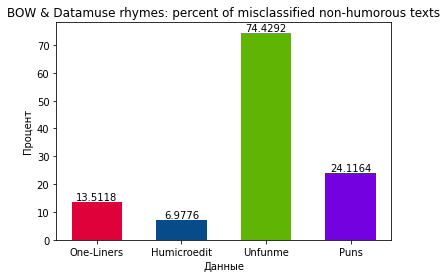

In [ ]:
#BOW & Rhymes
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [13.512,6.978,74.429,24.116]
plt.title('BOW & Datamuse rhymes: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .7, round(perf, 4), color='black', 
            ha='center')

#### Графики BOW + рифмы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __рифм__ с таким же процентом при обычной классификации __BOW__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

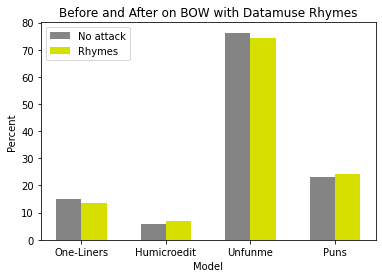

In [25]:
#BOW Rhymes 
index = np.arange(4)
bow_before = [15.087,5.859,76.256,23.077]
bow_ryt = [13.512,6.978,74.429,24.116]
width = 0.3
plt.title('Before and After on BOW with Datamuse Rhymes')
#отдельно для до, отдельно для после
plt.bar(index, bow_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, bow_ryt, label='Rhymes', color="#D7DF01", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### Word2Vec & LR

#### One-Liners

In [ ]:
oneline_test_adversarial_rhyme = oneline_test_adversarial_rhyme.drop(columns=['tokens'])

In [ ]:
oneline_test_adversarial_rhyme["tokens"] = oneline_test_adversarial_rhyme["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_oneline_adv_rhyme = get_word2vec_embeddings(w2v, oneline_test_adversarial_rhyme["tokens"])

In [ ]:
X_test_oneline_w2v_adv_ryt = embeddings_oneline_adv_rhyme

In [ ]:
y_test_oneline_w2v_adv_ryt = oneline_test_adversarial_rhyme["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_oneline_w2v, y_train_oneline_w2v)
w2v_oneline_adv_predict_ryt = classifier.predict(X_test_oneline_w2v_adv_ryt)

In [ ]:
w2v_oneline_adv_predict_ryt = pd.Series(w2v_oneline_adv_predict_ryt)
w2v_oneline_adv_predict_ryt = cleanse_semicolon(w2v_oneline_adv_predict_ryt)

In [ ]:
y_test_oneline_w2v_adv_ryt = pd.Series(y_test_oneline_w2v_adv_ryt)
y_test_oneline_w2v_adv_ryt = cleanse_semicolon(y_test_oneline_w2v_adv_ryt)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_oneline_w2v_adv_ryt, w2v_oneline_adv_predict_ryt)
print("Adversarial rhymes W2V\nTrain on: One-liners  Test on: One-Liners \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes W2V
Train on: One-liners  Test on: One-Liners 
accuracy = 0.779, precision = 0.771, recall = 0.789, f1 = 0.779
Precision and recall on humorous class


In [ ]:
oneline_w2v_adversarial_rhymes = get_metrics_adversarial(y_test_oneline_w2v_adv_ryt, w2v_oneline_adv_predict_ryt)
print("Adversarial antonyms word2vec\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneline_w2v_adversarial_rhymes))

Adversarial antonyms word2vec
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 23.024%



#### Humicroedit

In [ ]:
humicro_test_adversarial_rhyme = humicro_test_adversarial_rhyme.drop(columns=['tokens'])

In [ ]:
humicro_test_adversarial_rhyme["tokens"] = humicro_test_adversarial_rhyme["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_humicro_adv_ryt = get_word2vec_embeddings(w2v, humicro_test_adversarial_rhyme["tokens"])

In [ ]:
X_test_humicro_w2v_adv_ryt = embeddings_humicro_adv_ryt

In [ ]:
y_test_humicro_w2v_adv_ryt = humicro_test_adversarial_rhyme["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_humicro_w2v, y_train_humicro_w2v)
w2v_humicro_adv_predict_ryt = classifier.predict(X_test_humicro_w2v_adv_ryt)

In [ ]:
w2v_humicro_adv_predict_ryt = pd.Series(w2v_humicro_adv_predict_ryt)
w2v_humicro_adv_predict_ryt = cleanse_semicolon(w2v_humicro_adv_predict_ryt)

In [ ]:
y_test_humicro_w2v_adv_ryt = pd.Series(y_test_humicro_w2v_adv_ryt)
y_test_humicro_w2v_adv_ryt = cleanse_semicolon(y_test_humicro_w2v_adv_ryt)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_humicro_w2v_adv_ryt, w2v_humicro_adv_predict_ryt)
print("Adversarial rhymes W2V\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes W2V
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.785, precision = 0.793, recall = 0.772, f1 = 0.785
Precision and recall on humorous class


In [ ]:
humicro_w2v_adversarial_rhymes = get_metrics_adversarial(y_test_humicro_w2v_adv_ryt, w2v_humicro_adv_predict_ryt)
print("Adversarial rhymes word2vec\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_w2v_adversarial_rhymes))

Adversarial rhymes word2vec
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 20.099%



#### Unfunme

In [ ]:
unfun_test_adversarial_rhyme = unfun_test_adversarial_rhyme.drop(columns=['tokens'])

In [ ]:
unfun_test_adversarial_rhyme["tokens"] = unfun_test_adversarial_rhyme["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_unfun_adv_ryt = get_word2vec_embeddings(w2v, unfun_test_adversarial_rhyme["tokens"])

In [ ]:
X_test_unfun_w2v_adv_ryt = embeddings_unfun_adv_ryt

In [ ]:
y_test_unfun_w2v_adv_ryt = unfun_test_adversarial_rhyme["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_unfun_w2v, y_train_unfun_w2v)
w2v_unfun_adv_predict_ryt = classifier.predict(X_test_unfun_w2v_adv_ryt)

In [ ]:
w2v_unfun_adv_predict_ryt = pd.Series(w2v_unfun_adv_predict_ryt)
w2v_unfun_adv_predict_ryt = cleanse_semicolon(w2v_unfun_adv_predict_ryt)

In [ ]:
y_test_unfun_w2v_adv_ryt = pd.Series(y_test_unfun_w2v_adv_ryt)
y_test_unfun_w2v_adv_ryt = cleanse_semicolon(y_test_unfun_w2v_adv_ryt)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_unfun_w2v_adv_ryt, w2v_unfun_adv_predict_ryt)
print("Adversarial rhymes W2V\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes W2V
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.681, precision = 0.863, recall = 0.694, f1 = 0.703
Precision and recall on humorous class


In [ ]:
unfun_w2v_adversarial_rhymes = get_metrics_adversarial(y_test_unfun_w2v_adv_ryt, w2v_unfun_adv_predict_ryt)
print("Adversarial rhymes word2vec\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_w2v_adversarial_rhymes))

Adversarial rhymes word2vec
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 36.073%



#### Puns

In [ ]:
puns_test_adversarial_rhyme = puns_test_adversarial_rhyme.drop(columns=['tokens'])

In [ ]:
puns_test_adversarial_rhyme["tokens"] = puns_test_adversarial_rhyme["text"].apply(tokenizer.tokenize)

In [ ]:
embeddings_puns_adv_ryt = get_word2vec_embeddings(w2v, puns_test_adversarial_rhyme["tokens"])

In [ ]:
X_test_puns_w2v_adv_ryt = embeddings_puns_adv_ryt

In [ ]:
y_test_puns_w2v_adv_ryt = puns_test_adversarial_rhyme["label"]

In [ ]:
classifier = lr_classifier

In [ ]:
classifier.fit(X_train_puns_w2v, y_train_puns_w2v)
w2v_puns_adv_predict_ryt = classifier.predict(X_test_puns_w2v_adv_ryt)

In [ ]:
w2v_puns_adv_predict_ryt = pd.Series(w2v_puns_adv_predict_ryt)
w2v_puns_adv_predict_ryt = cleanse_semicolon(w2v_puns_adv_predict_ryt)

In [ ]:
y_test_puns_w2v_adv_ryt = pd.Series(y_test_puns_w2v_adv_ryt)
y_test_puns_w2v_adv_ryt = cleanse_semicolon(y_test_puns_w2v_adv_ryt)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test_puns_w2v_adv_ryt, w2v_puns_adv_predict_ryt)
print("Adversarial rhymes W2V\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial rhymes W2V
Train on: Puns  Test on: Puns 
accuracy = 0.861, precision = 0.866, recall = 0.856, f1 = 0.861
Precision and recall on humorous class


In [ ]:
puns_w2v_adversarial_rhymes = get_metrics_adversarial(y_test_puns_w2v_adv_ryt, w2v_puns_adv_predict_ryt)
print("Adversarial rhymes word2vec\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_w2v_adversarial_rhymes))

Adversarial rhymes word2vec
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 13.306%



#### Процентные графики

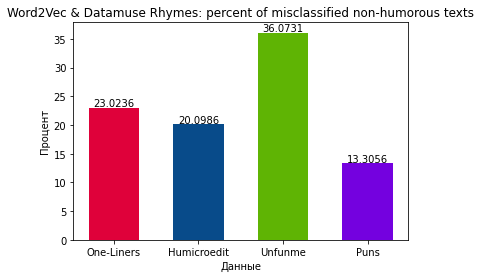

In [ ]:
#word2vec & rhymes
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [23.024,20.099,36.073,13.306]
plt.title('Word2Vec & Datamuse Rhymes: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .3, round(perf, 4), color='black', 
            ha='center')

#### Графики Word2Vec + Рифмы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием __рифм__ с таким же процентом при обычной классификации __W2V__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

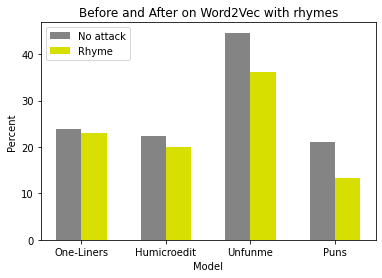

In [26]:
#W2V + rhymes 
index = np.arange(4)
w2v_before = [23.776,22.330,44.633,21.053]
w2v_ryt = [23.024,20.099,36.073,13.306]
width = 0.3
plt.title('Before and After on Word2Vec with rhymes')
#отдельно для до, отдельно для после
plt.bar(index, w2v_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, w2v_ryt, label='Rhyme', color="#D7DF01", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

### USE & ClassifierDL

In [ ]:
def replace_for_rhyme_dl(row):
  if row['label'] == 'non-humorous':
    text = row['text']
    if (len(text) != 0):
      text = text.split()
      word = text[-1]
      rhyme = api.words(rel_nry=word, max=1)
      if not rhyme:
        return row['text']
      new_word = rhyme[0]['word']
      print(word, new_word)
      return row['text'] + new_word
  return row['text']

#### One-Liners

In [ ]:
test_oneliners_dl_adv = test_oneliners_dl.toPandas()

In [ ]:
test_oneliners_dl_adv['text'] = test_oneliners_dl_adv.apply(lambda row: replace_for_rhyme_dl(row), axis=1)

In [ ]:
test_oneliners_dl_adv.to_csv("oneliners_adversarial.csv", index=False)

In [ ]:
test_oneliners_dl_adv = spark.read \
      .option("header", True) \
      .csv("oneliners_adversarial.csv")

In [ ]:
test_oneliners_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous| 3179|
|    humorous| 3185|
+------------+-----+



In [ ]:
oneline_dl_prediction_adv_ryt = oneline_model.transform(test_oneliners_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
oneline_dl_prediction_adv_ryt['result'] = oneline_dl_prediction_adv_ryt['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(oneline_dl_prediction_adv_ryt['label'], oneline_dl_prediction_adv_ryt['result'])
print("Slang 18+\nUniversal Sentence Encoder & ClassifierDL\nTrain on: One-liners  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Slang 18+
Universal Sentence Encoder & ClassifierDL
Train on: One-liners  Test on: Humicroedit 
accuracy = 0.863, precision = 0.866, recall = 0.860, f1 = 0.863
Precision and recall on humorous class


In [ ]:
oneliners_dl_adversarial_rhyme = get_metrics_adversarial(oneline_dl_prediction_adv_ryt['label'], oneline_dl_prediction_adv_ryt['result'])
print("Adversarial antonyms USE & ClassifierDL\nTrain on: One-liners  Test on: One-liners \nPercent of impacted non-humorous texts = %.3f%%\n" % (oneliners_dl_adversarial_rhyme))

Adversarial antonyms USE & ClassifierDL
Train on: One-liners  Test on: One-liners 
Percent of impacted non-humorous texts = 13.338%



#### Humicroedit

In [ ]:
test_humicro_dl_adv = test_humicro_dl.toPandas()

In [ ]:
test_humicro_dl_adv['text'] = test_humicro_dl_adv.apply(lambda row: replace_for_rhyme_dl(row), axis=1)

In [ ]:
test_humicro_dl_adv.to_csv("humicro_adversarial.csv", index=False)

In [ ]:
test_humicro_dl_adv = spark.read \
      .option("header", True) \
      .csv("humicro_adversarial.csv")

In [ ]:
test_humicro_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|    humorous| 5366|
|non-humorous| 5366|
+------------+-----+



In [ ]:
humicro_dl_prediction_adv_ryt = humicro_model.transform(test_humicro_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
humicro_dl_prediction_adv_ryt['result'] = humicro_dl_prediction_adv_ryt['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(humicro_dl_prediction_adv_ryt['label'], humicro_dl_prediction_adv_ryt['result'])
print("Adversarial Rhyme\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial Rhyme
Universal Sentence Encoder & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
accuracy = 0.902, precision = 0.902, recall = 0.902, f1 = 0.902
Precision and recall on humorous class


In [ ]:
humicro_dl_adversarial_rhyme = get_metrics_adversarial(humicro_dl_prediction_adv_ryt['label'], humicro_dl_prediction_adv_ryt['result'])
print("Adversarial antonym USE & ClassifierDL\nTrain on: Humicroedit  Test on: Humicroedit \nPercent of impacted non-humorous texts = %.3f%%\n" % (humicro_dl_adversarial_rhyme))

Adversarial antonym USE & ClassifierDL
Train on: Humicroedit  Test on: Humicroedit 
Percent of impacted non-humorous texts = 9.821%



#### Unfunme

In [ ]:
test_unfun_dl_adv = test_unfun_dl.toPandas()

In [ ]:
test_unfun_dl_adv['text'] = test_unfun_dl_adv.apply(lambda row: replace_for_rhyme_dl(row), axis=1)

INDEPENDENCE quintessence
publications sensation
DISAPPOINTING poignant
QUESTIONING testament
CHILDHOODS childhood
INFANTS instance
children building
SPECIES diabetes
WelFARE parallel
PROBLEMS knowledge
PARADE awake
REVIEWS pursue
LINES times
CAPSULE apple
TIRES fire
children building
executive imperative
REPARATIONS patience
OLYMPICS business
PARKS works
CAR bear
YEARS corps
MIND primed
YEAR bear
BUCKS ups
RESEARCH charge
mansions action
states case
SAFETY baby
contract caveat
city lily
CENTURY memory
BOMBING common
competitions vision
ITSELF excel
MILWAUKEE body
PAKISTAN attack
market circuit
BURRITO ego
PROGRAM attack
Players layer
REFORMS conform
STORE bear
DIOXIDE device
SUBJECT event
STADIUM medium
SUBSCRIPTIONS subscription
lampPOST lampposts
OSCARS foster
PROFESSIONALISM wisdom
TENT dreamt
SCORE bear
President respect
mailman romance
season people
REFLECTION perception
INCREASE disease
STAR bear
OFFENSE process
OFFICE solace
SCALPERS scalper
YEAR bear
TENNESSEE relief
disappoin

In [ ]:
test_unfun_dl_adv.to_csv("unfun_adversarial.csv", index=False)

In [ ]:
test_unfun_dl_adv = spark.read \
      .option("header", True) \
      .csv("unfun_adversarial.csv")

In [ ]:
test_unfun_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  220|
|    humorous|  719|
+------------+-----+



In [ ]:
unfun_dl_prediction_adv_ryt = unfun_model.transform(test_unfun_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
unfun_dl_prediction_adv_ryt['result'] = unfun_dl_prediction_adv_ryt['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(unfun_dl_prediction_adv_ryt['label'], unfun_dl_prediction_adv_ryt['result'])
print("Adversarial Rhyme\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial Rhyme
Universal Sentence Encoder & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
accuracy = 0.766, precision = 0.766, recall = 1.000, f1 = 0.664
Precision and recall on humorous class


In [ ]:
unfun_dl_adversarial_rhyme = get_metrics_adversarial(unfun_dl_prediction_adv_ryt['label'], unfun_dl_prediction_adv_ryt['result'])
print("Adversarial Rhyme USE & ClassifierDL\nTrain on: Unfunme  Test on: Unfunme \nPercent of impacted non-humorous texts = %.3f%%\n" % (unfun_dl_adversarial_rhyme))

Adversarial Rhyme USE & ClassifierDL
Train on: Unfunme  Test on: Unfunme 
Percent of impacted non-humorous texts = 100.000%



#### Puns

In [ ]:
test_puns_dl_adv = test_puns_dl.toPandas()

In [ ]:
test_puns_dl_adv['text'] = test_puns_dl_adv.apply(lambda row: replace_for_rhyme_dl(row), axis=1)

prison business
president respect
about account
person service
cage ph
help elbe
pippins pippin
enough become
monster water
delivery inquiry
water order
recently frequency
here bear
announced around
morning important
problem awesome
minute business
replied design
here bear
worse force
us nuts
part support
January theory
clinic business
itself excel
birth forth
stored bird
fiddle civil
records record
decision business
naked basic
added acid
study body
fahrenheit clarify
different interest
years corps
lobby body
best bereft
brocade abate
problem awesome
saved dazed
people beetle
start support
prison business
after factor
instructor factor
ex steps
America imperative
hour bear
temporary theory
agreed disease
friend condemned
however river
lightning writing
soaked moped
years corps
help elbe
looking woman
gas cats
Alaska banana
present essence
other number
course parse
being meaning
patient agent
share for
taxes acid
problem awesome
other number
vegetables premises
prison business
minutes 

In [ ]:
test_puns_dl_adv.to_csv("puns_adversarial.csv", index=False)

In [ ]:
test_puns_dl_adv = spark.read \
      .option("header", True) \
      .csv("puns_adversarial.csv")

In [ ]:
test_puns_dl_adv.groupby("label")\
    .count()\
    .orderBy(col("count")).show()

+------------+-----+
|       label|count|
+------------+-----+
|non-humorous|  481|
|    humorous|  485|
+------------+-----+



In [ ]:
puns_dl_prediction_adv_ryt = puns_model.transform(test_puns_dl_adv).select("label", "text", "class.result").toPandas()

In [ ]:
puns_dl_prediction_adv_ryt['result'] = puns_dl_prediction_adv_ryt['result'].apply(lambda x: x[0])

In [ ]:
accuracy, precision, recall, f1 = get_metrics(puns_dl_prediction_adv_ryt['label'], puns_dl_prediction_adv_ryt['result'])
print("Adversarial Rhyme\nUniversal Sentence Encoder & ClassifierDL\nTrain on: Puns  Test on: Puns \naccuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f\nPrecision and recall on humorous class" % (accuracy, precision, recall, f1))

Adversarial Rhyme
Universal Sentence Encoder & ClassifierDL
Train on: Puns  Test on: Puns 
accuracy = 0.824, precision = 0.806, recall = 0.856, f1 = 0.824
Precision and recall on humorous class


In [ ]:
puns_dl_adversarial_rhyme = get_metrics_adversarial(puns_dl_prediction_adv_ryt['label'], puns_dl_prediction_adv_ryt['result'])
print("Adversarial Rhyme USE & ClassifierDL\nTrain on: Puns  Test on: Puns \nPercent of impacted non-humorous texts = %.3f%%\n" % (puns_dl_adversarial_rhyme))

Adversarial Rhyme USE & ClassifierDL
Train on: Puns  Test on: Puns 
Percent of impacted non-humorous texts = 20.790%



#### Процентные графики

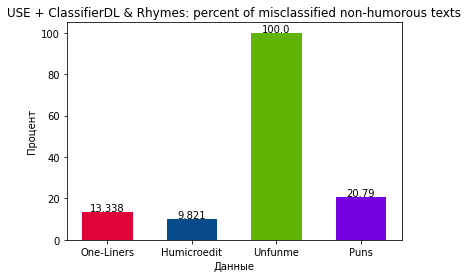

In [17]:
#Universal Sentence Encoder & rhymes
index = np.arange(4)
width = 0.6
colors = ['#DF013A', '#084B8A', '#5FB404', '#7401DF']
values = [13.338,9.821,100.000,20.790]
plt.title('USE + ClassifierDL & Rhymes: percent of misclassified non-humorous texts')
plt.bar(index, values, label = 'Percent', color=colors, width=0.6)
plt.xticks(index, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Процент')
plt.xlabel("Данные")

for i, perf in enumerate(values):
    plt.text(i, perf + .4, round(perf, 4), color='black', 
            ha='center')

Text(0.5, 0, 'Dataset')

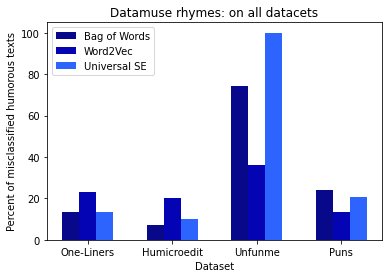

In [18]:
#Universal Sentence Encoder & DataMuse rhymes
index = np.arange(4)
width = 0.2
values_bow = [13.512,6.978,74.429,24.116]
values_w2v = [23.024,20.099,36.073,13.306]
values_dl = [13.338,9.821,100.000,20.790]
plt.title('Datamuse rhymes: on all datacets')
plt.bar(index, values_bow, label = 'Bag of Words', color='#08088A', width=0.2)
plt.bar(index + width, values_w2v, label = 'Word2Vec', color='#0404B4', width=0.2)
plt.bar(index + 2 * width, values_dl, label = 'Universal SE', color='#2E64FE', width=0.2)
plt.legend(loc='upper left')
plt.xticks(index + width, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Percent of misclassified humorous texts')
plt.xlabel("Dataset")

#### Графики USE + Рифмы + исходные данные
Сравним процент неправильно классифицированных текстов с использованием рифм с таким же процентом при обычной классификации __USE__. Это поможет понять, насколько удалось изменить предсказание модели.

Text(0.5, 0, 'Model')

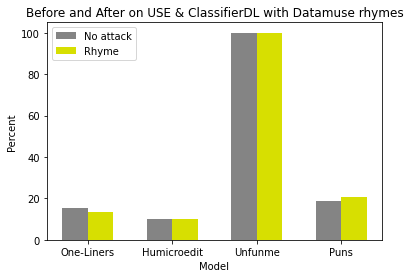

In [27]:
#USE & Rhymes
index = np.arange(4)
use_before = [15.445,10.194,100.000,18.919]
use_ryt = [13.338,9.821,100.000,20.790]
width = 0.3
plt.title('Before and After on USE & ClassifierDL with Datamuse rhymes')
#отдельно для до, отдельно для после
plt.bar(index, use_before, label = 'No attack', color="#848484", width=0.3)
plt.bar(index + width, use_ryt, label='Rhyme', color="#D7DF01", width=0.3)

plt.xticks(index + width/2, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.legend(loc='upper left')
plt.ylabel('Percent')
plt.xlabel("Model")

#Состязательные атаки : дополнительные графики

Сравним, как хорошо атаки меняют датасеты (на какой процент изменяются данные при каждой атаке):

Text(0.5, 0, 'Dataset')

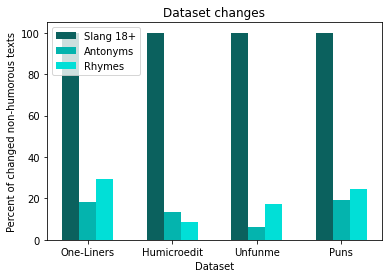

In [28]:
#Dataset changes by attack
index = np.arange(4)
width = 0.2
values_slang = [100, 100, 100, 100]
values_ant = [18.228,13.491,5.989,19.048]
values_ryt = [29.247,8.675,17.326,24.431]
plt.title('Dataset changes')
plt.bar(index, values_slang, label = 'Slang 18+', color='#0B615E', width=0.2)
plt.bar(index + width, values_ant, label = 'Antonyms', color='#04B4AE', width=0.2)
plt.bar(index + 2 * width, values_ryt, label = 'Rhymes', color='#01DFD7', width=0.2)
plt.legend(loc='upper left')
plt.xticks(index + width, ['One-Liners','Humicroedit','Unfunme', 'Puns'])
plt.ylabel('Percent of changed non-humorous texts')
plt.xlabel("Dataset")

***********
Спасибо за внимание!

*-Фролова Ульяна*